In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set() # for plot styling
from scipy import stats
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Election_Data.xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
# Shape function displays the number of rows and columns in a dafaframe.
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 1525 rows and 10 columns


In [5]:
# Checking Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [6]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [7]:
df = df.drop(['Unnamed: 0'],axis=1)

In [8]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [10]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull()
df.isnull().sum()
print("There are", df.isnull().values.sum(),"Missing Values in dataset")

There are 0 Missing Values in dataset


In [11]:
cat=[]
num=[]
for i in df.columns:
 if df[i].dtype=="object":
    cat.append(i)
 else:
    num.append(i)
print(cat)
print(num)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [12]:
for variable in cat:
    print(variable,":", sum(df[variable] == '?'))

vote : 0
gender : 0


In [13]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [14]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [15]:
# Checking for Duplicates
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [16]:
# Removing Duplicate Data
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(1517, 9)

### unique values for categorical variables

In [18]:
### unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [19]:
# Checking the Skewness in data
df.skew(axis=0,skipna=True)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

## Univariate Analysis

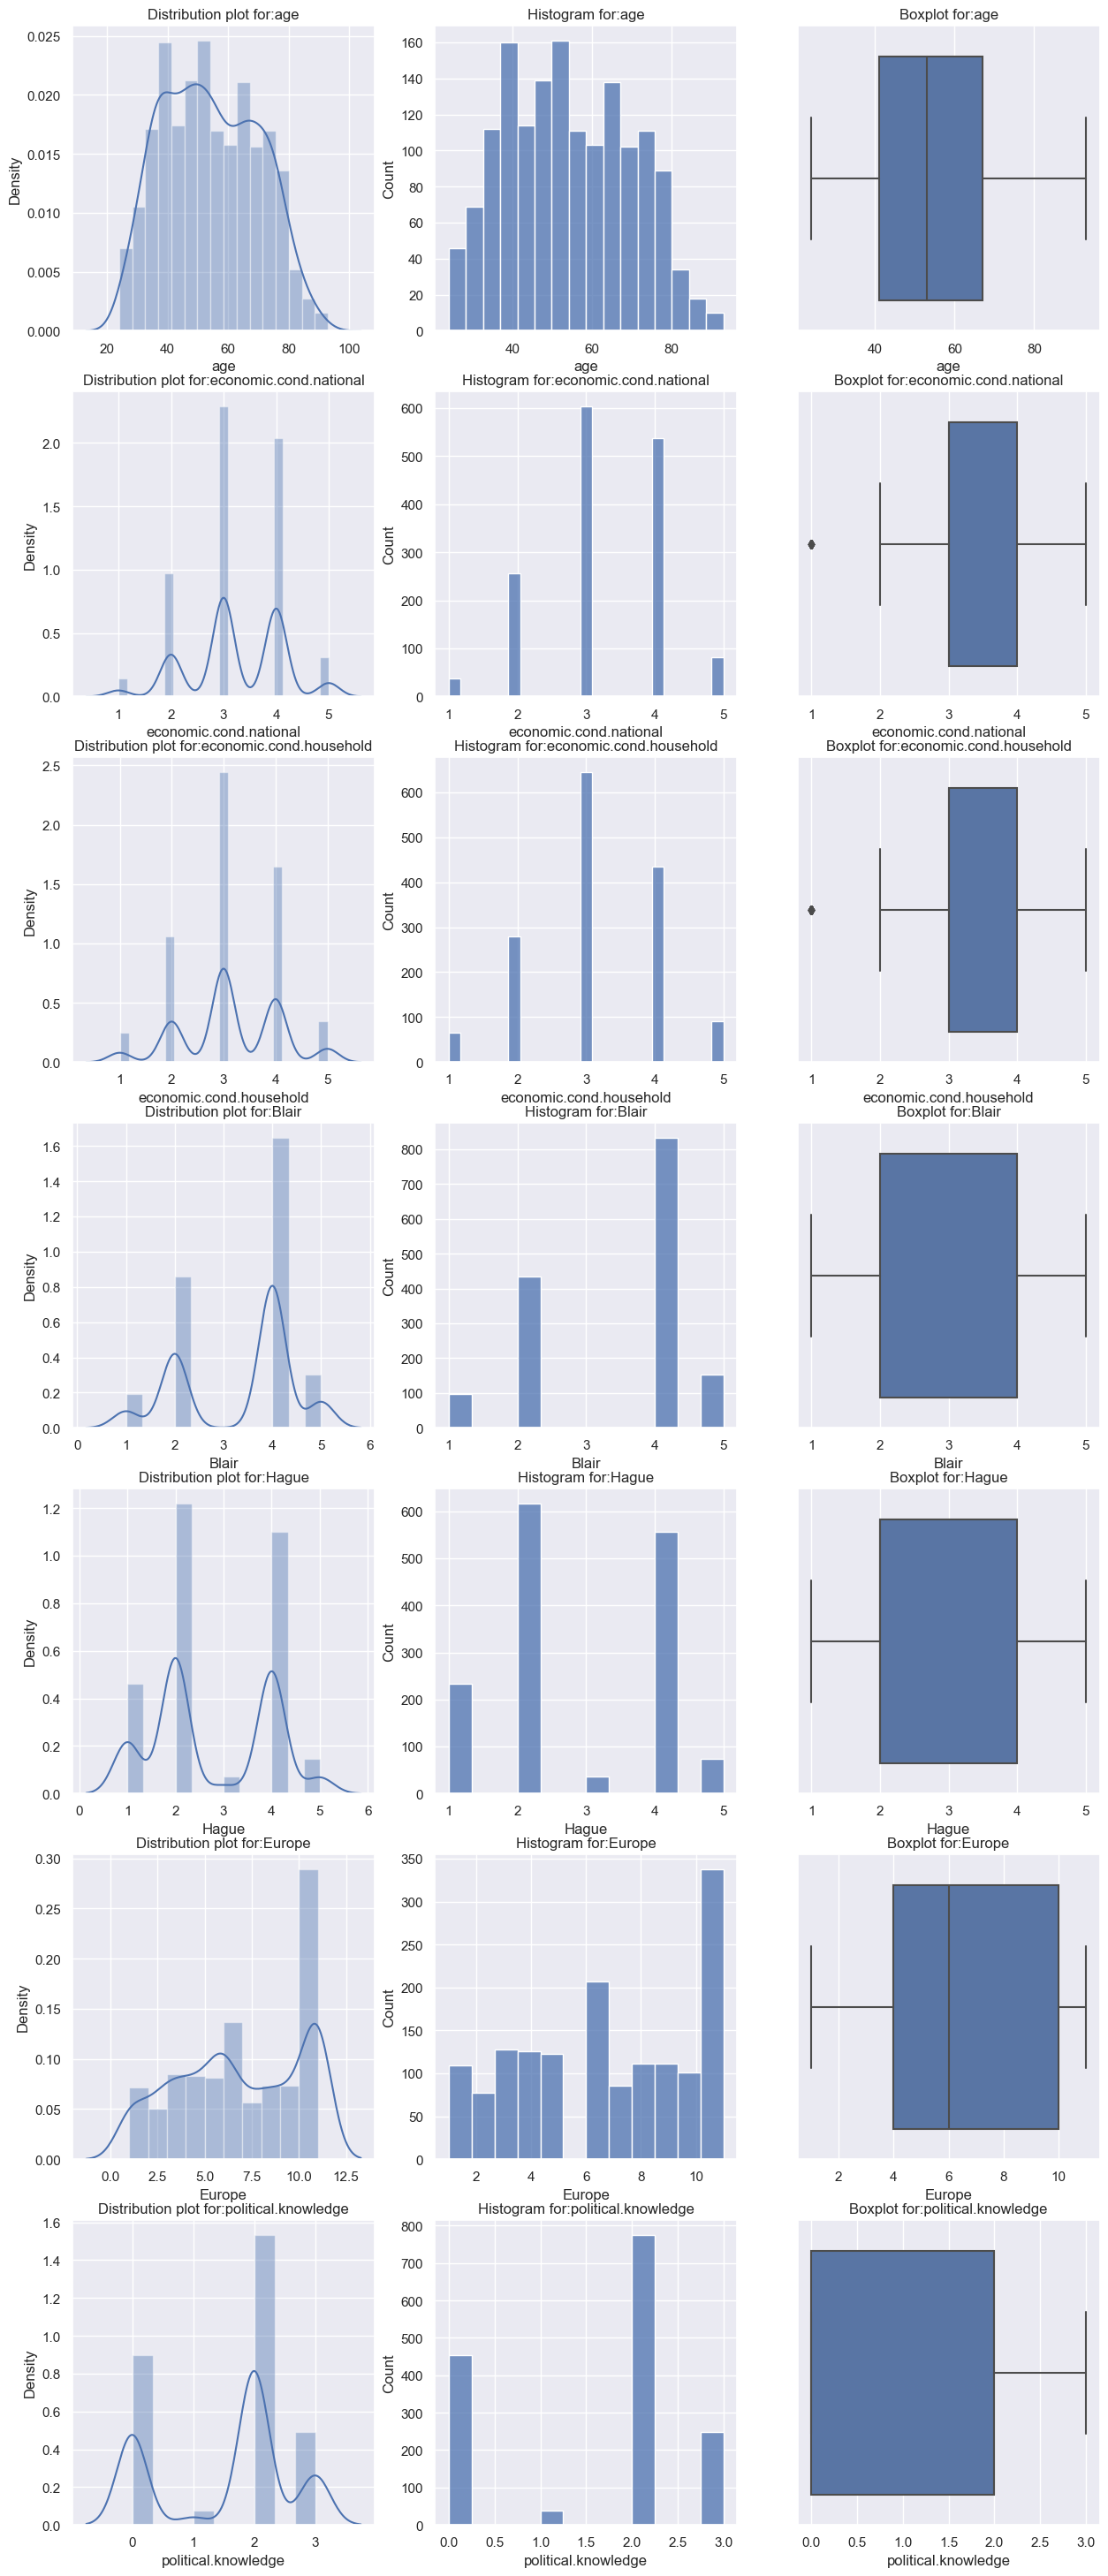

In [20]:
a=1
plt.figure(figsize=(15,112))
for i in df.columns:
    if df[i].dtype != 'object':
        plt.subplot(21,3,a)
        sns.distplot(df[i])
        plt.title("Distribution plot for:" + i)
        plt.subplot(21,3,a+1)
        sns.histplot(df[i])
        plt.title("Histogram for:" + i)
        plt.subplot(21,3,a+2)
        sns.boxplot(df[i])
        plt.title("Boxplot for:" + i)
        a+=3

## Bivariate and Multivariate Analysis

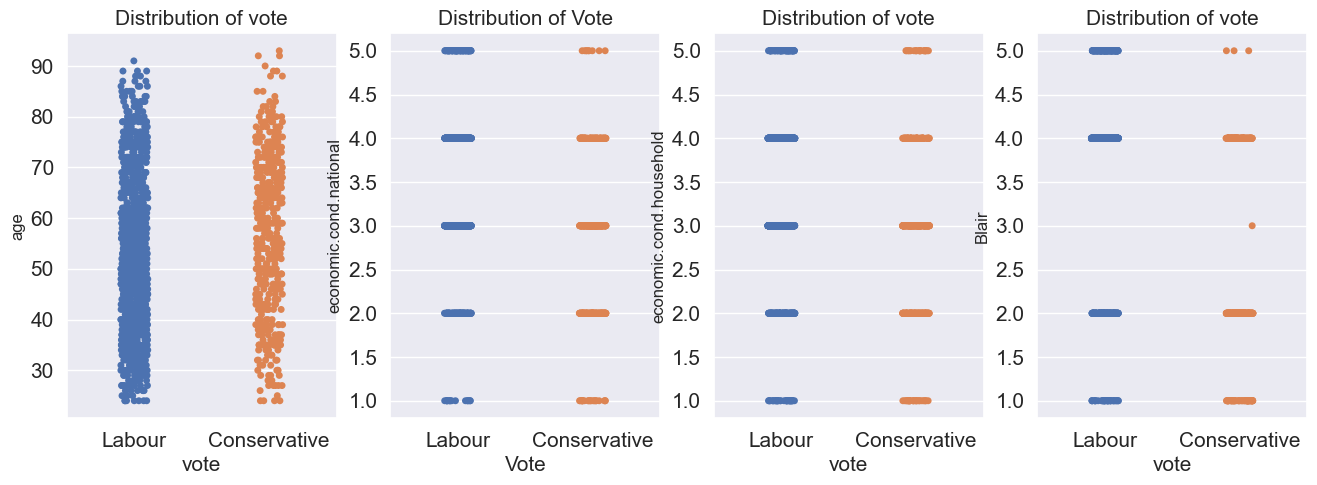

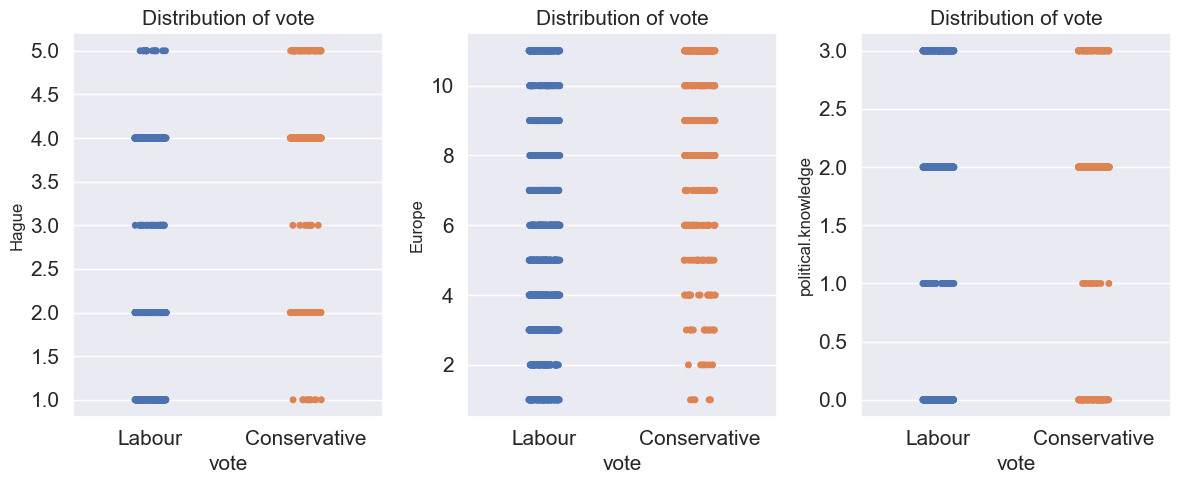

In [21]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,5))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(12,5))
sns.stripplot(df["vote"], df['age'],orient='v',jitter=True,ax=ax1)
ax1.set_xlabel('vote', fontsize=15)
ax1.set_title('Distribution of vote', fontsize=15)
ax1.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True, ax=ax2)
ax2.set_xlabel('Vote', fontsize=15)
ax2.set_title('Distribution of Vote', fontsize=15)
ax2.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True, ax=ax3)
ax3.set_xlabel('vote', fontsize=15)
ax3.set_title('Distribution of vote', fontsize=15)
ax3.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['Blair'], jitter=True, ax=ax4)
ax4.set_xlabel('vote', fontsize=15)
ax4.set_title('Distribution of vote', fontsize=15)
ax4.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['Hague'], jitter=True, ax=ax5)
ax5.set_xlabel('vote', fontsize=15)
ax5.set_title('Distribution of vote', fontsize=15)
ax5.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['Europe'], jitter=True, ax=ax6)
ax6.set_xlabel('vote', fontsize=15)
ax6.set_title('Distribution of vote', fontsize=15)
ax6.tick_params(labelsize=15)
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True, ax=ax7)
ax7.set_xlabel('vote', fontsize=15)
ax7.set_title('Distribution of vote', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

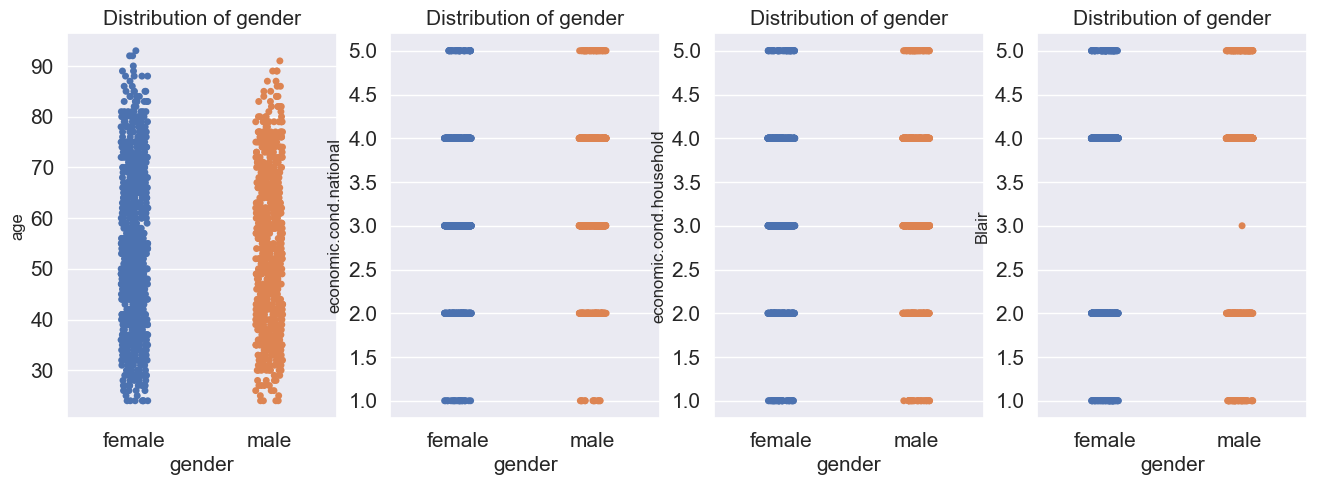

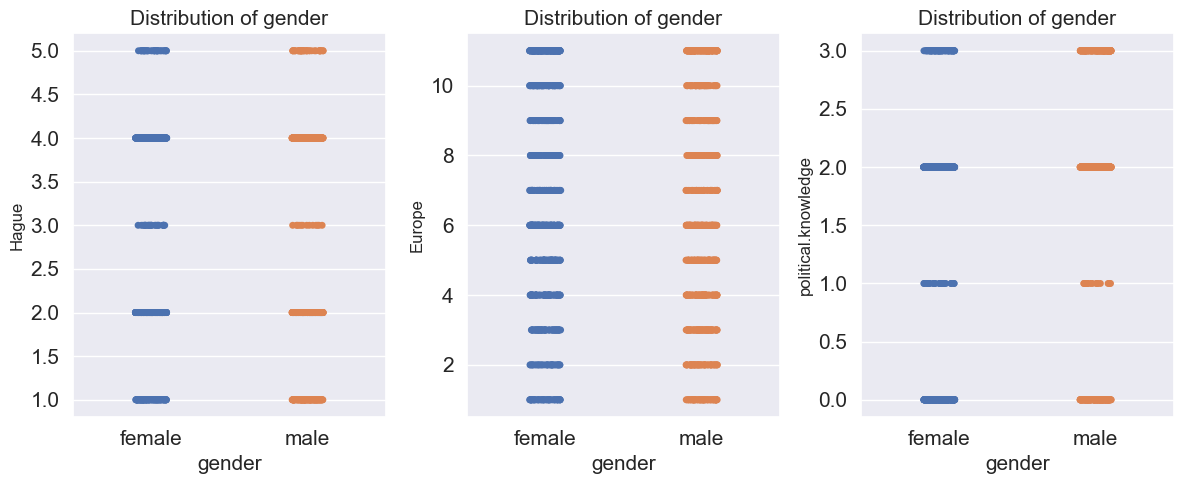

In [22]:
fig, (ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(16,5))
fig, (ax5,ax6,ax7)=plt.subplots(1,3,figsize=(12,5))
sns.stripplot(df["gender"], df['age'],orient='v',jitter=True,ax=ax1)
ax1.set_xlabel('gender', fontsize=15)
ax1.set_title('Distribution of gender', fontsize=15)
ax1.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['economic.cond.national'], jitter=True, ax=ax2)
ax2.set_xlabel('gender', fontsize=15)
ax2.set_title('Distribution of gender', fontsize=15)
ax2.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['economic.cond.household'], jitter=True, ax=ax3)
ax3.set_xlabel('gender', fontsize=15)
ax3.set_title('Distribution of gender', fontsize=15)
ax3.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['Blair'], jitter=True, ax=ax4)
ax4.set_xlabel('gender', fontsize=15)
ax4.set_title('Distribution of gender', fontsize=15)
ax4.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['Hague'], jitter=True, ax=ax5)
ax5.set_xlabel('gender', fontsize=15)
ax5.set_title('Distribution of gender', fontsize=15)
ax5.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['Europe'], jitter=True, ax=ax6)
ax6.set_xlabel('gender', fontsize=15)
ax6.set_title('Distribution of gender', fontsize=15)
ax6.tick_params(labelsize=15)
sns.stripplot(df["gender"], df['political.knowledge'], jitter=True, ax=ax7)
ax7.set_xlabel('gender', fontsize=15)
ax7.set_title('Distribution of gender', fontsize=15)
ax7.tick_params(labelsize=15)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

#### Check for Data Distribution w.r.t Vote

<Figure size 2400x800 with 0 Axes>

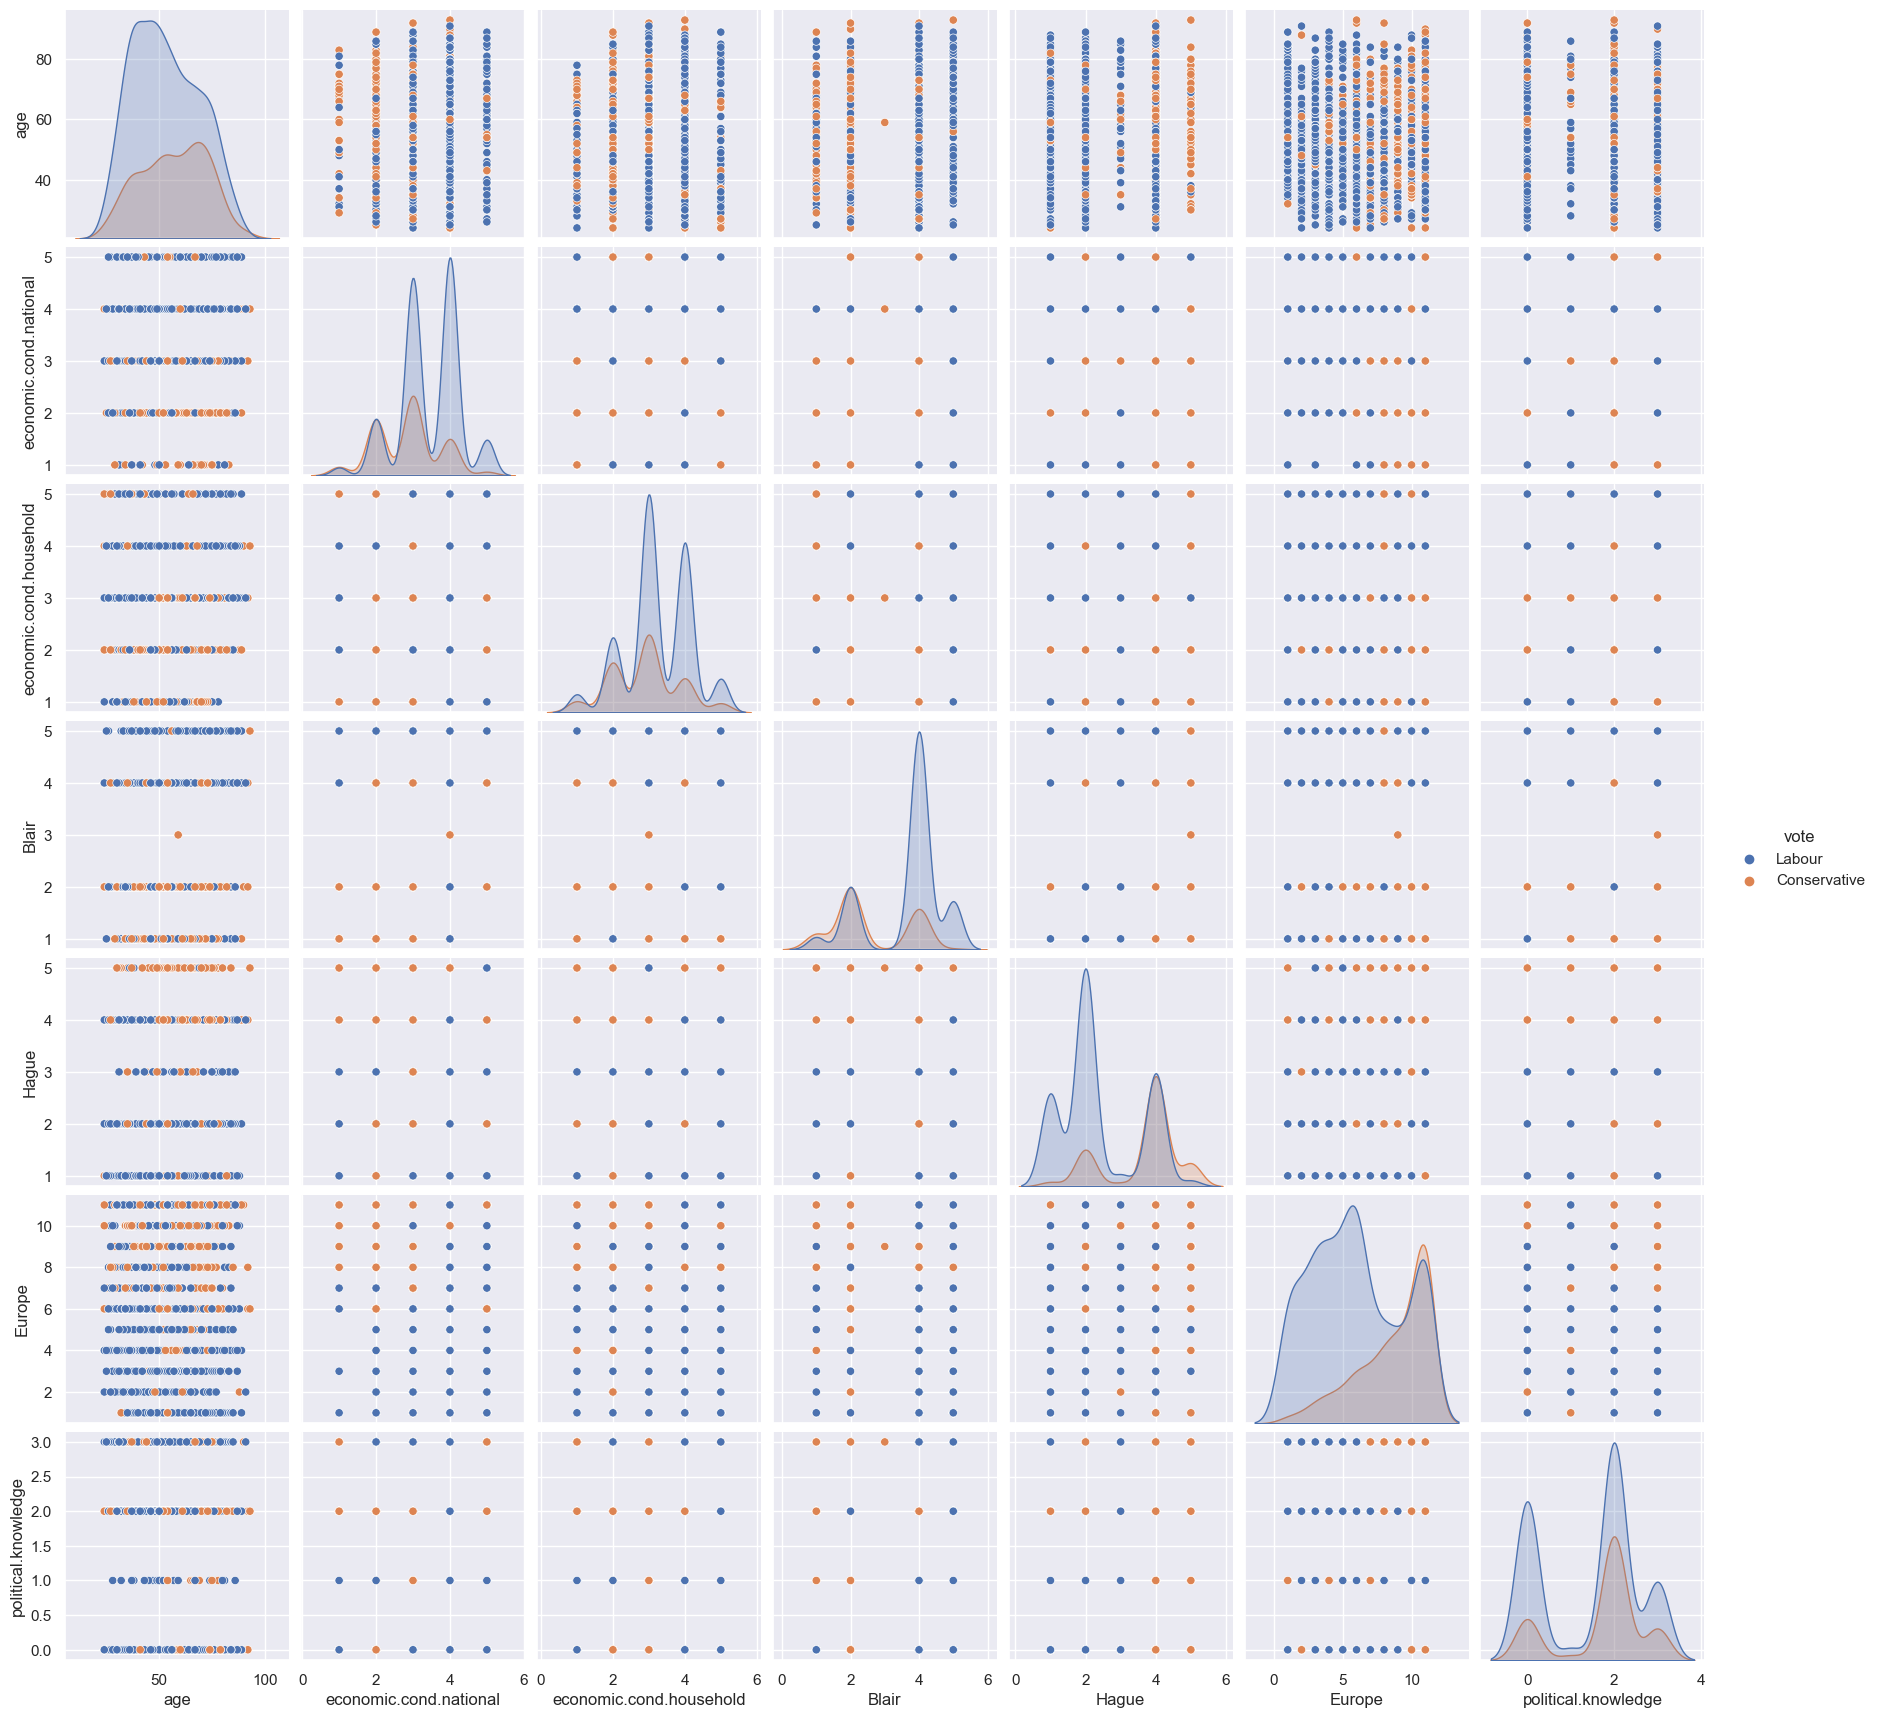

In [23]:
# Data Distribution
plt.figure(figsize=(24,8))
sns.pairplot(df,hue='vote');

In [24]:
#correlation matrix
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


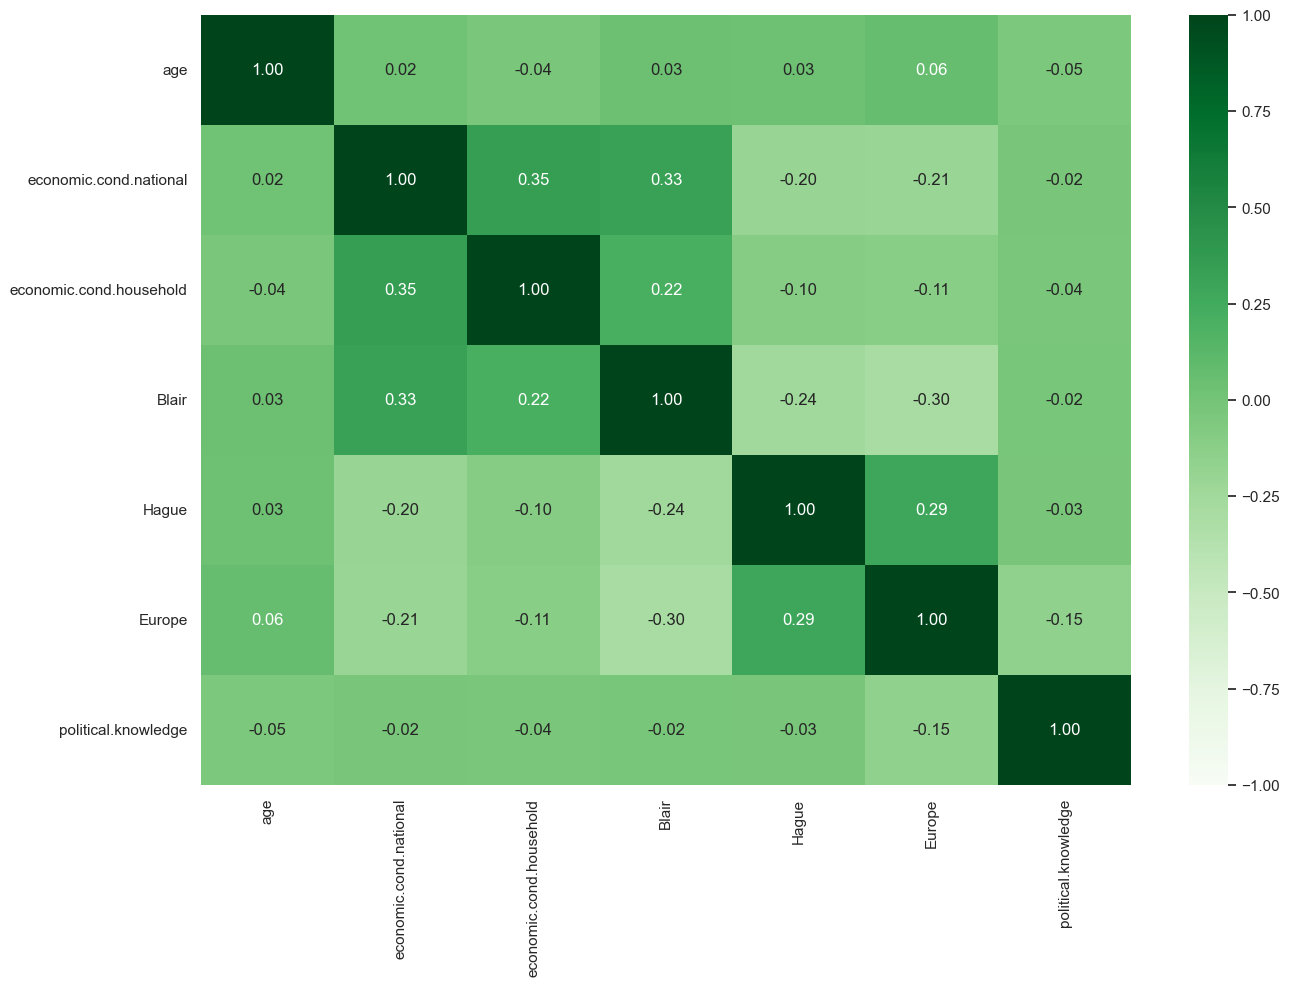

In [25]:
# plot the correlation coefficients as a heatmap
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greens', vmax=1, vmin=-1);

### Check for Outliers

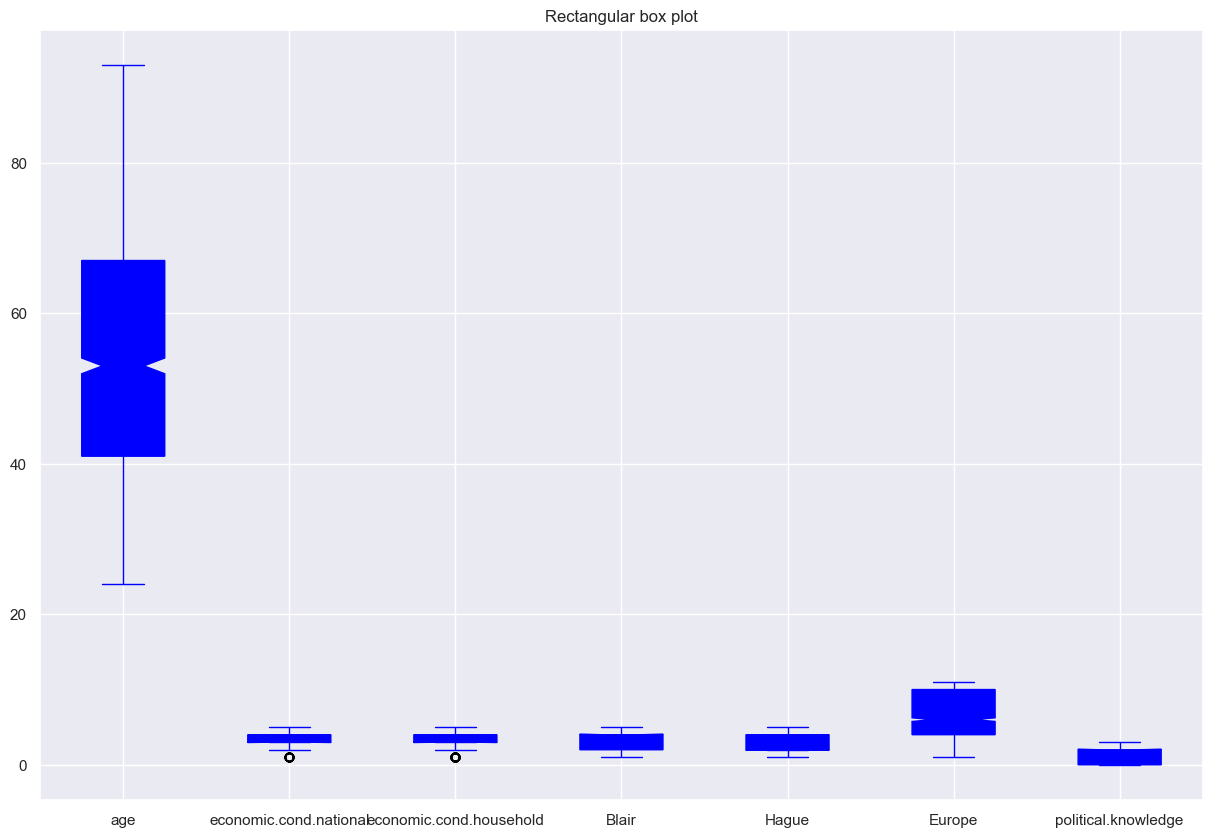

In [26]:
#Check for presence of outliers
plt.figure(figsize=(15,10))
df[num].boxplot(patch_artist = True, color='blue',notch=True)
plt.title('Rectangular box plot')
plt.show();


#### There are nearly no outliers in most of the numerical columns, only outlier is in economic.cond.national variable & economic.cond.household Variable . In Gaussian Naive Bayes, outliers will affect the shape of the  Gaussian distribution and have the usual effects on the mean etc. So depending on our use case, it makes sense to remove outlier

In [27]:
print('Range of values: ', df['economic.cond.national'].max()-df['economic.cond.national'].min())

Range of values:  4


In [28]:
#Central values
print('Minimum value economic.cond.national: ', df['economic.cond.national'].min())
print('Maximum economic.cond.national: ',df['economic.cond.national'].max())
print('Mean value economic.cond.national: ', df['economic.cond.national'].mean())
print('Median value economic.cond.national: ',df['economic.cond.national'].median())
print('Standard deviation economic.cond.national: ', df['economic.cond.national'].std())
print('Null values economic.cond.national: ',df['economic.cond.national'].isnull().sum())

Minimum value economic.cond.national:  1
Maximum economic.cond.national:  5
Mean value economic.cond.national:  3.245220830586684
Median value economic.cond.national:  3.0
Standard deviation economic.cond.national:  0.8817924638047195
Null values economic.cond.national:  0


In [29]:
#Quartiles
Q1=df['economic.cond.national'].quantile(q=0.25)
Q3=df['economic.cond.national'].quantile(q=0.75)
print('economic.cond.national - 1st Quartile (Q1) is: ', Q1)
print('economic.cond.national - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of economic.cond.national is ', stats.iqr(df['economic.cond.national']))

economic.cond.national - 1st Quartile (Q1) is:  3.0
economic.cond.national - 3st Quartile (Q3) is:  4.0
Interquartile range (IQR) of economic.cond.national is  1.0


In [30]:
#Outlier detection from Interquartile range (IQR) in original data
#IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in economic.cond.national: ', L_outliers)
print('Upper outliers in economic.cond.national: ', U_outliers)

Lower outliers in economic.cond.national:  1.5
Upper outliers in economic.cond.national:  5.5


In [31]:
num_outliers_upper = len(df[df['economic.cond.national'] > U_outliers])
num_outliers_lower = len(df[df['economic.cond.national'] < U_outliers])

# Print the results
print('Number of outliers in economic.cond.national upper:', num_outliers_upper)
print('Number of outliers in economic.cond.national lower:', num_outliers_lower)

Number of outliers in economic.cond.national upper: 0
Number of outliers in economic.cond.national lower: 1517


In [32]:
# Calculate the percentage of outliers in the 'economic.cond.national' column (upper and lower)
percent_outliers_upper = (num_outliers_upper / len(df)) * 100
percent_outliers_lower = (num_outliers_lower / len(df)) * 100

# Print the results
print('% of Outlier in economic.cond.national upper:', round(percent_outliers_upper, 2))
print('% of Outlier in economic.cond.national lower:', round(percent_outliers_lower, 2))

% of Outlier in economic.cond.national upper: 0.0
% of Outlier in economic.cond.national lower: 100.0


In [33]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [34]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

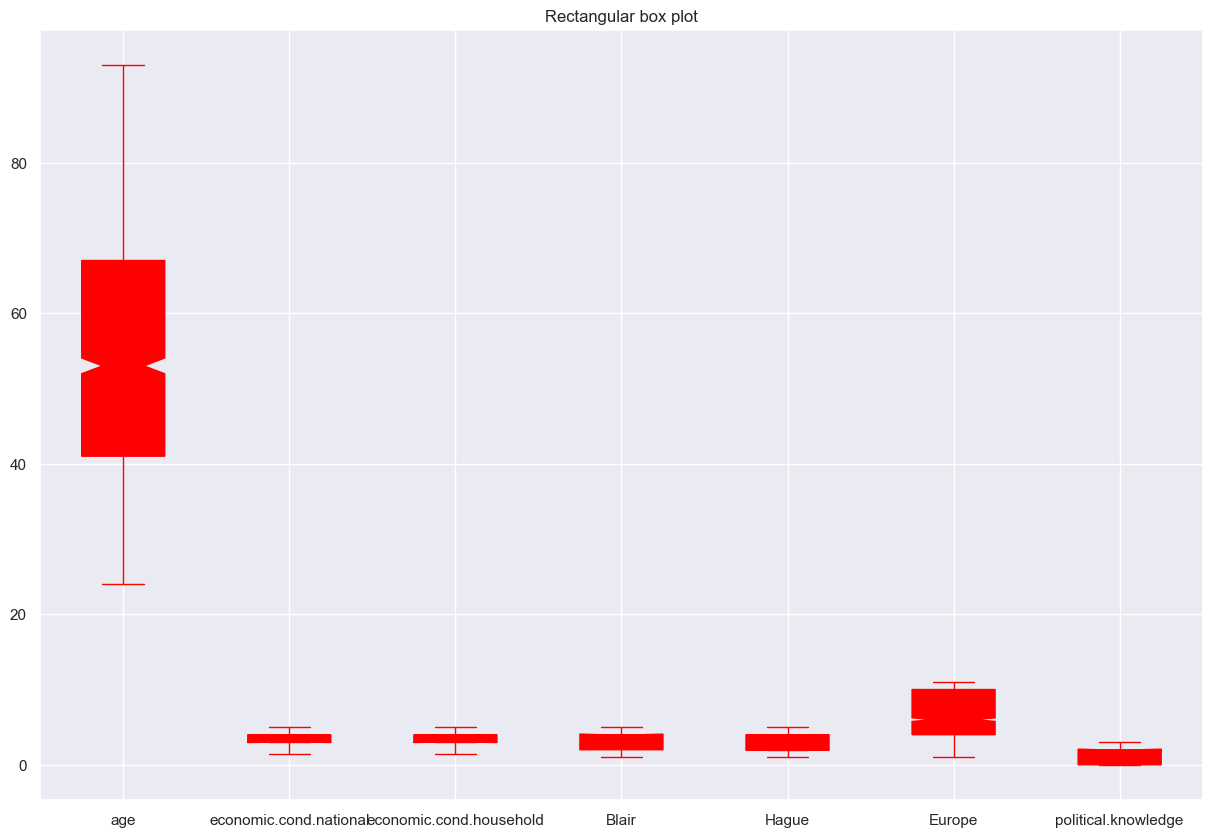

In [35]:
#Check for presence of outliers
plt.figure(figsize=(15,10))
df[num].boxplot(patch_artist = True, color='red',notch=True)
plt.title('Rectangular box plot')
plt.show();

In [36]:
cat

['vote', 'gender']

In [37]:
cat1 = ['vote', 'gender']

In [38]:
df=pd.get_dummies(df, columns=cat1,drop_first=True)
df.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [39]:
# Copy all the predictor variables into X dataframe
X=df.drop('vote_Labour',axis=1)
# Copy target into the y dataframe. 
y=df['vote_Labour']

In [40]:
# Var prior to scaling 
X.var()

age                        246.544655
economic.cond.national       0.728713
economic.cond.household      0.785491
Blair                        1.380089
Hague                        1.519005
Europe                      10.883687
political.knowledge          1.175961
gender_male                  0.249099
dtype: float64

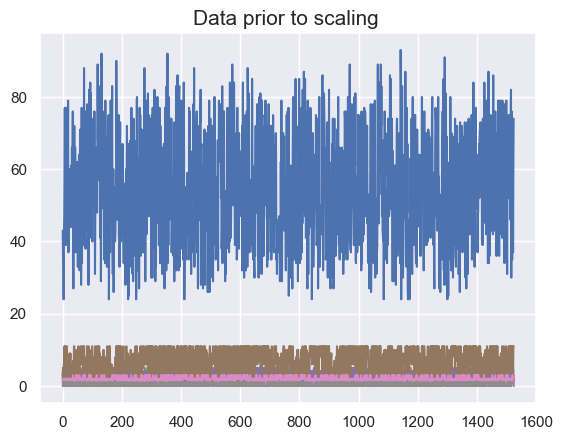

In [41]:
# Data prior to scaling 
plt.plot(X)
plt.title('Data prior to scaling ', fontsize=15)
plt.show()

In [42]:
# Scaling the attributes.
X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender_male']]

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5.0,3.0,2,4,11,3,1
1521,73,2.0,2.0,4,4,8,2,1
1522,37,3.0,3.0,5,4,2,2,1
1523,61,3.0,3.0,1,4,11,2,1


In [43]:
# Assuming you have your data in a DataFrame named X with the specified columns
columns_to_scale = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender_male']

# Create a new DataFrame with only the columns to be scaled
X_to_scale = X[columns_to_scale]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns to scale their values
X_scaled = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=columns_to_scale)

# Replace the original columns in the DataFrame X with the scaled columns
X[columns_to_scale] = X_scaled

In [44]:
# Calculate the variance of each column after scaling
variance_post_scaling = X_scaled.var()

print("Variance post scaling:")
print(variance_post_scaling)

Variance post scaling:
age                        1.00066
economic.cond.national     1.00066
economic.cond.household    1.00066
Blair                      1.00066
Hague                      1.00066
Europe                     1.00066
political.knowledge        1.00066
gender_male                1.00066
dtype: float64


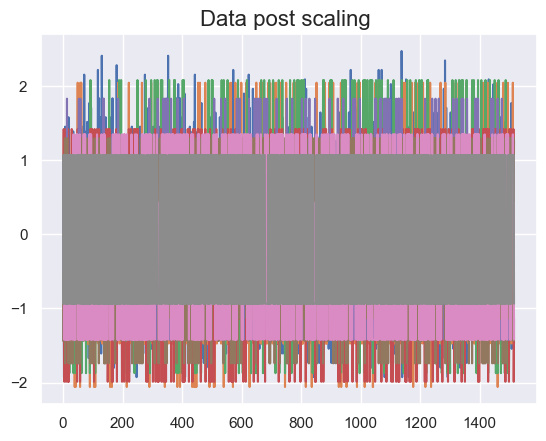

In [45]:
# Data post scaling 
plt.plot(X_scaled)
plt.title('Data post scaling ', fontsize=16)
plt.show()

In [46]:
X_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [47]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: uint8

In [48]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.30, random_state=1)

In [49]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (1061, 8)
X_test (456, 8)
y_train (1061,)
y_test (456,)


In [50]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=1)
Logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg',
                   verbose=1)

In [51]:
## Performance Matrix on train data set
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score_train=Logistic_model.score(X_train,y_train) ## Accuracy
print("The Logistic Regression Model Score on train data set is %.3f " % Logistic_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict)) ## Confusion Matrix
print(metrics.classification_report(y_train,y_train_predict)) ## Classification report

The Logistic Regression Model Score on train data set is 0.834 
[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



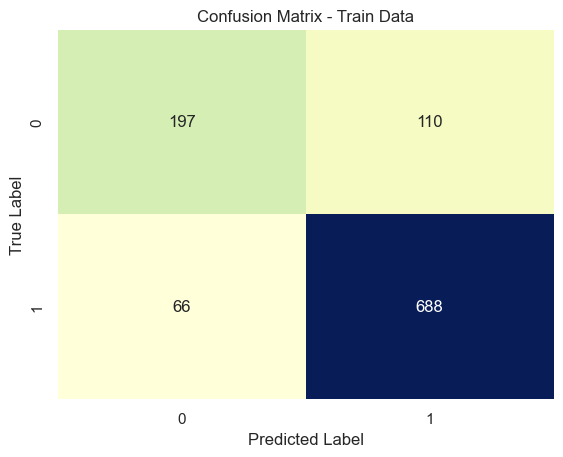

In [52]:
# Get predictions on the training dataset
y_train_predict = Logistic_model.predict(X_train)

# Calculate the confusion matrix
conf_matrix_train = confusion_matrix(y_train, y_train_predict)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Train Data')
plt.show()

In [53]:
## Performance Matrix on test data set
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score_test=Logistic_model.score(X_test,y_test) ## Accuracy
print("The Logistic Regression Model Score on test data set is %.3f " % Logistic_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict)) ## Confusion Matrix
print(metrics.classification_report(y_test,y_test_predict)) ## Classification report

The Logistic Regression Model Score on test data set is 0.829 
[[111  42]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



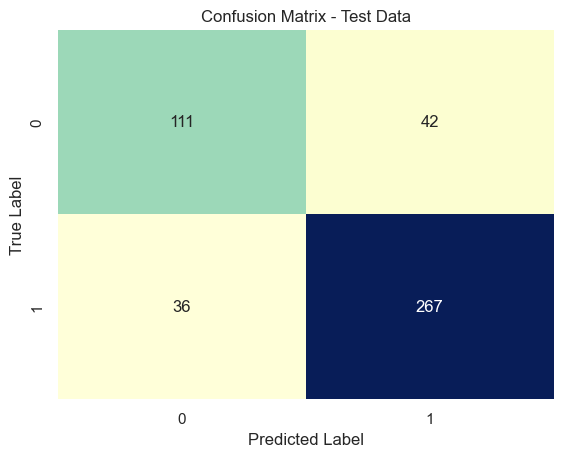

In [54]:
# Get predictions on the training dataset
y_test_predict = Logistic_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_predict)

# Plot the confusion matrix using seaborn's heatmap
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Data')
plt.show()

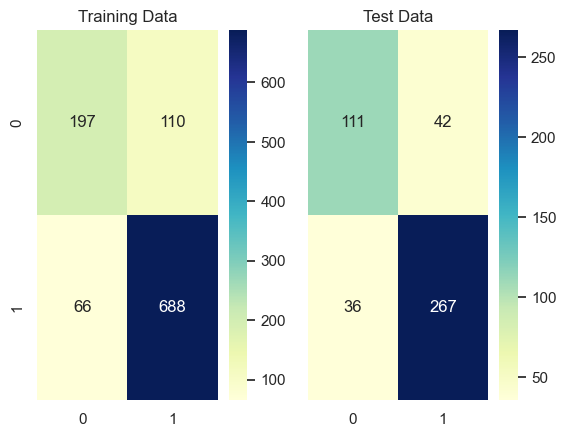

In [55]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
# Plotting confusion matrix for the Training Data
plot_0 = sns.heatmap(confusion_matrix(y_train, y_train_predict), annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=a[0][0])
a[0][0].set_title('Training Data')

# Plotting confusion matrix for the Test Data
plot_1 = sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='.5g', cmap="YlGnBu", cbar=True, ax=a[0][1])
a[0][1].set_title('Test Data')

plt.show()

In [56]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train, y_train_predict))
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test, y_test_predict))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [57]:
grid={'penalty':['l2','none','l1','elasticnet'],
      'solver':['liblinear','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001],
      'max_iter': [10000, 5000,15000]}

In [58]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = Logistic_model, param_grid = grid, cv = cv, n_jobs=2)
grid_search.fit(X_train, y_train)

[LibLinear]

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=LogisticRegression(max_iter=10000, penalty='none',
                                          solver='newton-cg', verbose=1),
             n_jobs=2,
             param_grid={'max_iter': [10000, 5000, 15000],
                         'penalty': ['l2', 'none', 'l1', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]})

In [59]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, solver='liblinear', verbose=1)


In [60]:
best_model_lr = grid_search.best_estimator_

In [61]:
# Prediction on the training set
ytrain_predict_lr = best_model_lr.predict(X_train)
ytest_predict_lr = best_model_lr.predict(X_test)

In [62]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model_lr.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.428858,0.571142
1,0.155518,0.844482
2,0.006996,0.993004
3,0.839503,0.160497
4,0.066109,0.933891


In [63]:
best_model_score_train = best_model_lr.score(X_train, y_train)

# Print the best model's score on the training dataset post-tuning
print("The Best Logistic Regression Model Score on train data set post tuning is %.3f " % best_model_score_train)

The Best Logistic Regression Model Score on train data set post tuning is 0.834 


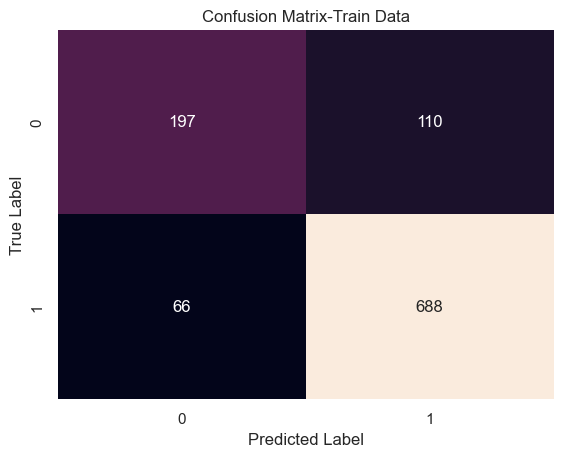

In [64]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lr.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lr.predict(X_train)),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Train Data')
plt.show()

The ROC_AUC score for LR Tuned Model train data set 0.89 


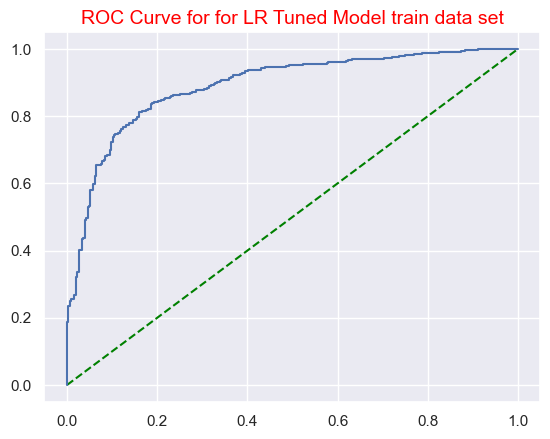

In [65]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for LR Tuned Model train data set %.2f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for for LR Tuned Model train data set",fontsize=14,color = 'red');

In [66]:
best_model_score_test = best_model_lr.score(X_test, y_test)

# Print the best model's score on the training dataset post-tuning
print("The Best Logistic Regression Model Score on test data set post tuning is %.3f " % best_model_score_test)

The Best Logistic Regression Model Score on test data set post tuning is 0.829 


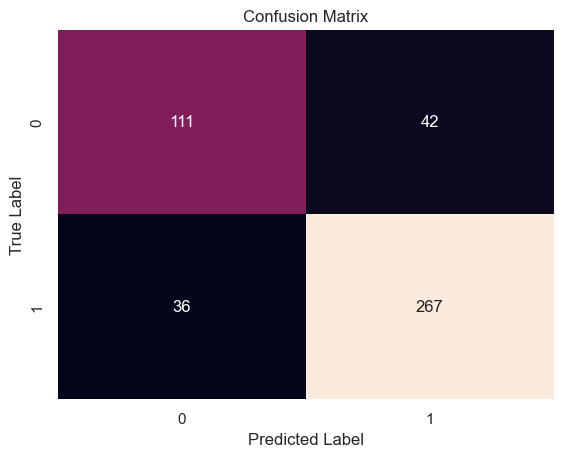

In [67]:
# Get the confusion matrix on the test data
confusion_matrix(y_test,best_model_lr.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model_lr.predict(X_test)),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The ROC_AUC score for LR Tuned Model test data set 0.88 


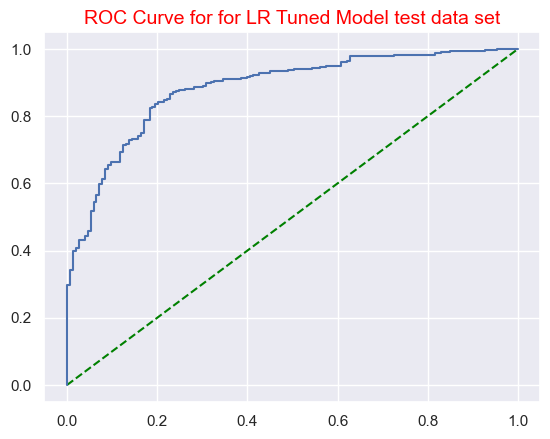

In [68]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print("The ROC_AUC score for LR Tuned Model test data set %.2f " % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='green')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for for LR Tuned Model test data set",fontsize=14,color = 'red');

In [69]:
print('Classification Report of the training data:\n\n',classification_report(y_train,  y_train_predict))
print('Classification Report of the test data:\n\n',classification_report(y_test, y_test_predict))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [70]:
(best_model_lr.score(X_train, y_train)-best_model_lr.score(X_test, y_test))

0.00517138746961654

## LDA

In [71]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [72]:
## Performance Matrix on train data set
y_train_predict=LDA_model.predict(X_train)
LDA_model_score_train=LDA_model.score(X_train,y_train)
print("The LDA Model Score on train data set is %.3f " % LDA_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The LDA Model Score on train data set is 0.834 
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



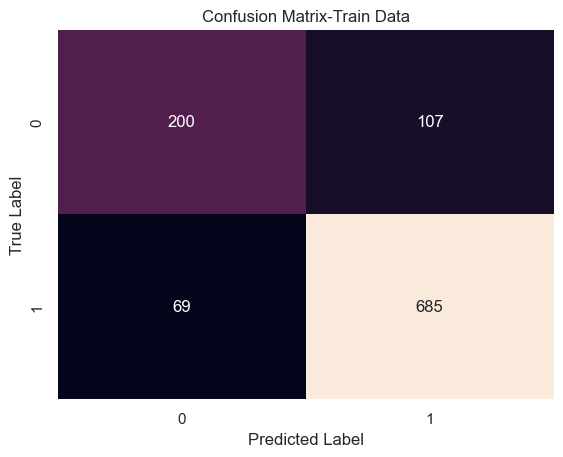

In [73]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,LDA_model.predict(X_train))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Train Data')
plt.show()

In [74]:
#Performance Matrix on test data set
y_test_predict=LDA_model.predict(X_test)
LDA_model_score_test=LDA_model.score(X_test,y_test)
print("The LDA Model Score on test data set is %.3f " % LDA_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

The LDA Model Score on test data set is 0.831 
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



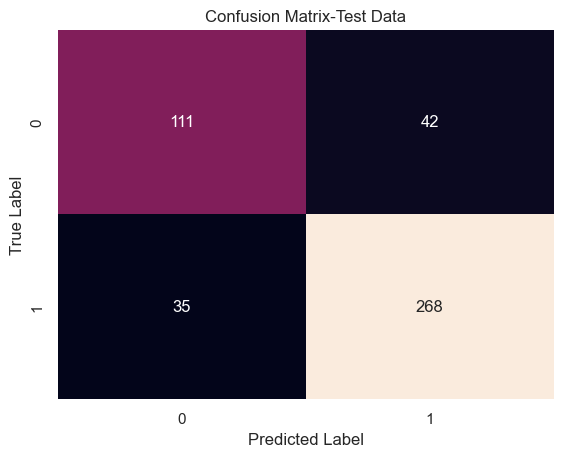

In [75]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,LDA_model.predict(X_test))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Test Data')
plt.show()


In [76]:
grid_lda ={'solver' :['svd', 'lsqr', 'eigen']}
grid_search_lda = GridSearchCV(estimator = LDA_model, param_grid = grid_lda, cv = cv, n_jobs=2)
grid_search_lda.fit(X_train, y_train)
best_model_lda = grid_search_lda.best_estimator_


In [77]:
ytrain_predict_lda = best_model_lda.predict(X_train)
ytest_predict_lda= best_model_lda.predict(X_test)

In [78]:
## Getting the probabilities on the test set
ytest_predict_prob=best_model_lda.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.466328,0.533672
1,0.137291,0.862709
2,0.005950,0.994050
3,0.866706,0.133294
4,0.053474,0.946526


In [79]:
best_model_lda_score_train = best_model_lda.score(X_train, y_train)
#### Model Evaluation for Train Data
print("The Best LDA Model Score on train data set post tuning is %.3f " % best_model_lda_score_train)

The Best LDA Model Score on train data set post tuning is 0.835 


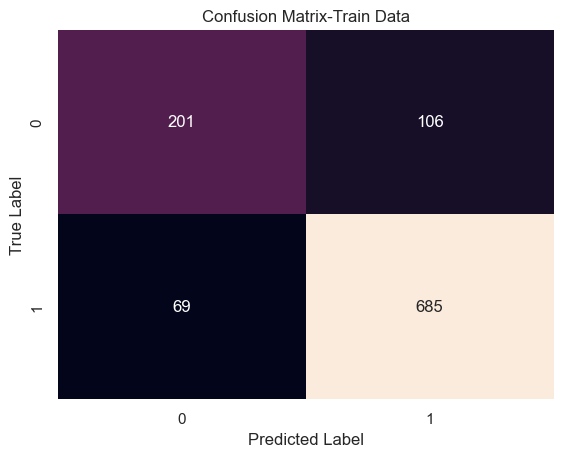

In [80]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lda.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lda.predict(X_train)),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Train Data')
plt.show()

The ROC_AUC score for LDA Tuned Model train data set 0.890 


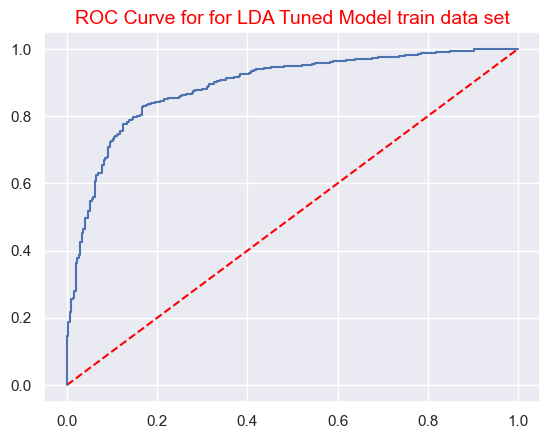

In [81]:
# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for LDA Tuned Model train data set %.3f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for for LDA Tuned Model train data set",fontsize=14,color = 'red');

In [82]:
best_model_lda_score_test = best_model_lda.score(X_test, y_test)
#### Model Evaluation for Train Data
print("The Best LDA Model Score on test data post tuning set is %.3f " % best_model_lda_score_test)

The Best LDA Model Score on test data post tuning set is 0.831 


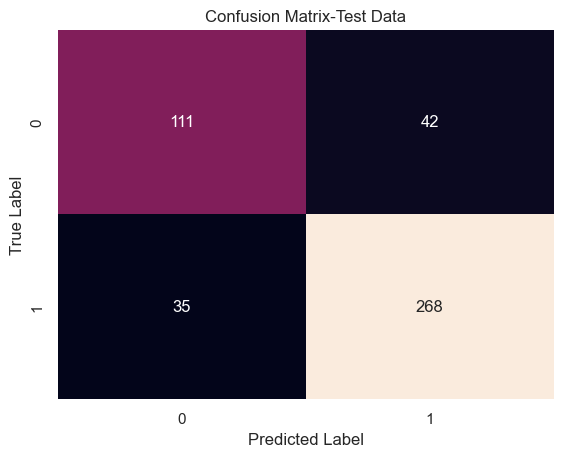

In [83]:
# Get the confusion matrix on the Test data
confusion_matrix(y_test,best_model_lda.predict(X_test))
sns.heatmap(confusion_matrix(y_test,best_model_lda.predict(X_test)),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Test Data')
plt.show()

The ROC_AUC score for LDA Tuned Model test data set 0.888 


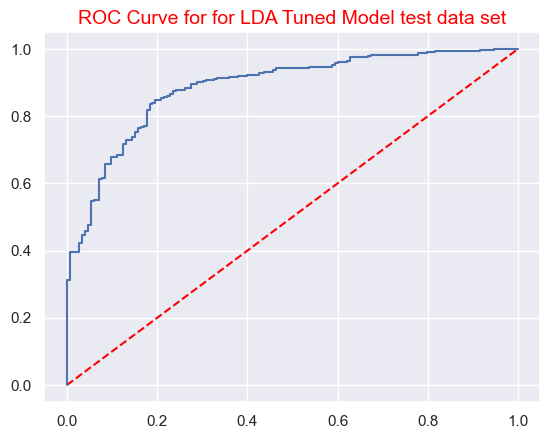

In [84]:
# predict probabilities
probs = best_model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print("The ROC_AUC score for LDA Tuned Model test data set %.3f " % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for for LDA Tuned Model test data set",fontsize=14,color = 'red');

In [85]:
# Classification of Best LDA Model on Train and Test Data
print('Classification Report of the training data:\n\n',classification_report(y_train, y_train_predict))
print('Classification Report of the test data:\n\n',classification_report(y_test, y_test_predict))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [86]:
(best_model_lda.score(X_train, y_train)-best_model_lda.score(X_test, y_test))*100

0.3920912082279293

## KNN

#### Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

In [87]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score_train=KNN_model.score(X_train, y_train)
print("The KNN Model Score on Train data %.3f " % KNN_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The KNN Model Score on Train data 0.857 
[[217  90]
 [ 62 692]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [89]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score_test = KNN_model.score(X_test, y_test)
print("The KNN Model Score on Test data %.3f " % KNN_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The KNN Model Score on Test data 0.827 
[[109  44]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456



In [90]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
 knn = KNeighborsClassifier(n_neighbors=k)
 knn.fit(X_train, y_train)
 # evaluate test accuracy
 scores = knn.score(X_test, y_test)
 ac_scores.append(scores)
# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2149122807017544,
 0.19736842105263153,
 0.17324561403508776,
 0.1842105263157895,
 0.18201754385964908,
 0.17105263157894735,
 0.17763157894736847,
 0.16885964912280704,
 0.16666666666666663,
 0.17105263157894735]

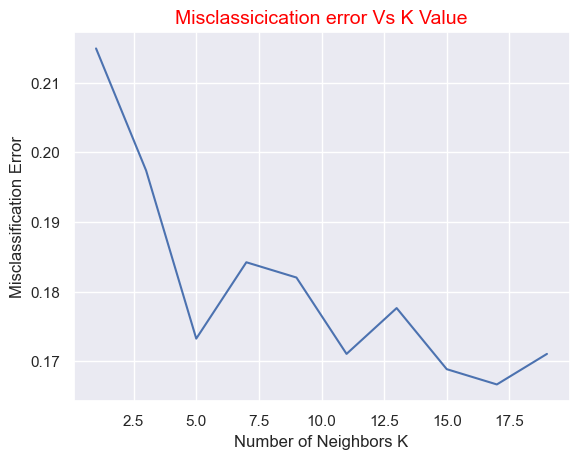

In [91]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title("Misclassicication error Vs K Value",fontsize=14,color = 'red');
plt.show()

In [92]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model_1=KNeighborsClassifier(n_neighbors= 11)
KNN_model_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [93]:
# Performance Matrix on train data set
y_train_predict = KNN_model_1.predict(X_train)
KNN_model_score_train_New=KNN_model_1.score(X_train, y_train)
print("The KNN Model Score on Train data %.3f " % KNN_model_score_train_New)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The KNN Model Score on Train data 0.843 
[[206 101]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



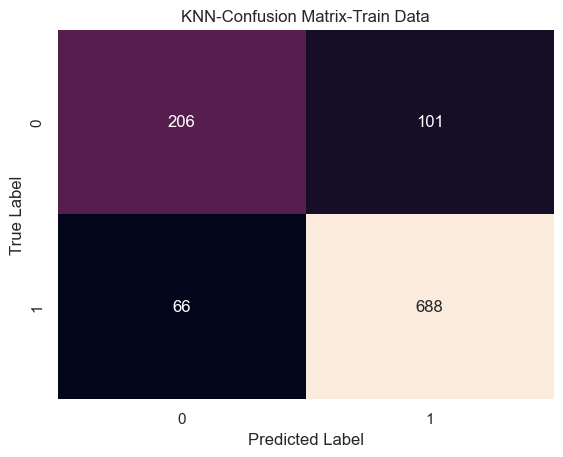

In [94]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,KNN_model_1.predict(X_train))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN-Confusion Matrix-Train Data')
plt.show()

The ROC_AUC score for KNN train data set 0.911 


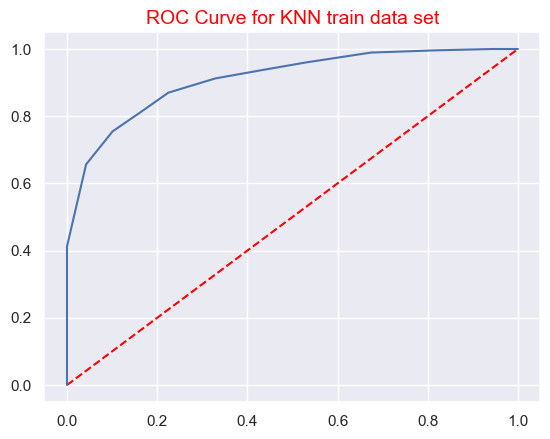

In [95]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for KNN train data set %.3f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for KNN train data set",fontsize=14,color = 'red');

In [96]:
## Performance Matrix on test data set
y_test_predict = KNN_model_1.predict(X_test)
KNN_model_score_test_New = KNN_model_1.score(X_test, y_test)
print("The KNN Model Score on Test data %.3f " % KNN_model_score_test_New)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The KNN Model Score on Test data 0.829 
[[105  48]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



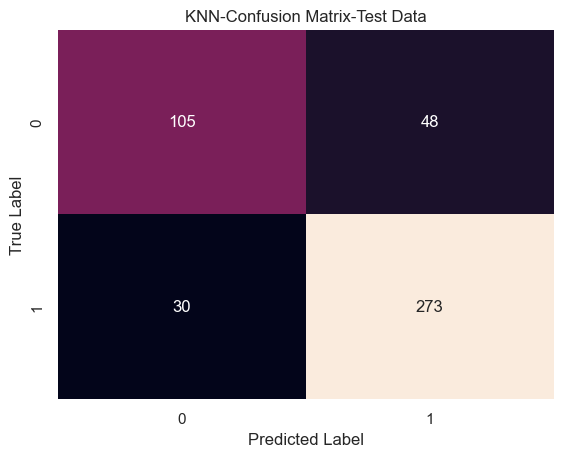

In [99]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,KNN_model_1.predict(X_test))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('KNN-Confusion Matrix-Test Data')
plt.show()

The ROC_AUC score for KNN test data set 0.889 


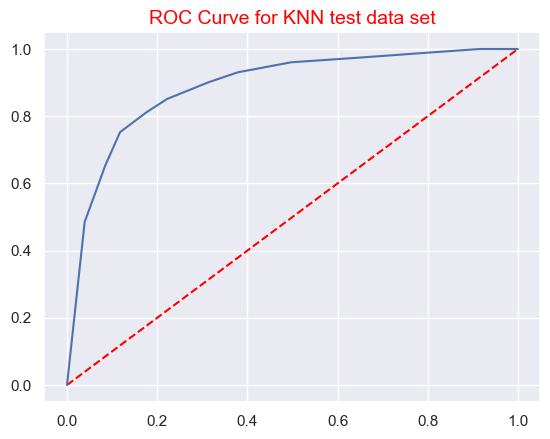

In [98]:
# predict probabilities
probs = KNN_model_1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print("The ROC_AUC score for KNN test data set %.3f " % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.title("ROC Curve for KNN test data set",fontsize=14,color = 'red');

### Naive Bayes

In [100]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [101]:
#Performance Matrix on train data set
y_train_predict=NB_model.predict(X_train)
Naive_Bayes_model_score_train=NB_model.score(X_train, y_train) ## Accuracy
print("The Naive Bayes Model Score on train data is %.3f " % Naive_Bayes_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict)) ## confusion_matrix
print(metrics.classification_report(y_train,y_train_predict)) ## classification_report

The Naive Bayes Model Score on train data is 0.834 
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



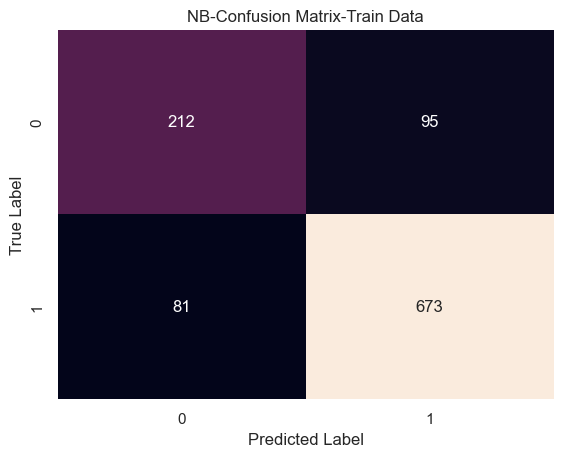

In [102]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,NB_model.predict(X_train))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NB-Confusion Matrix-Train Data')
plt.show()

In [103]:
# Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
Naive_Bayes_model_score_test=NB_model.score(X_test, y_test) ## Accuracy
print("The Naive Bayes Model Score on test data is %.3f " % Naive_Bayes_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict)) ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict)) ## classification_report

The Naive Bayes Model Score on test data is 0.822 
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



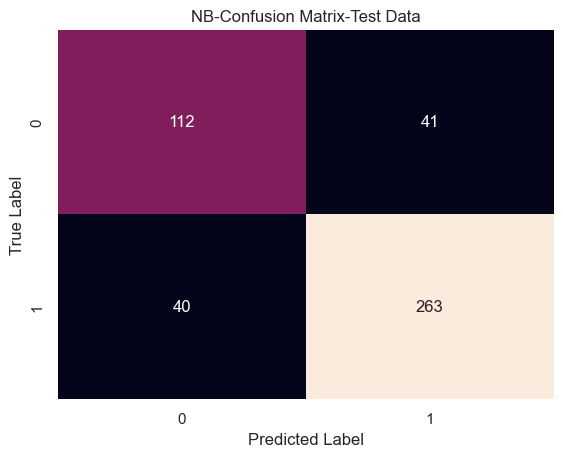

In [104]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,NB_model.predict(X_test))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('NB-Confusion Matrix-Test Data')
plt.show()

## Naive Bayes with SMOTE

In [105]:
from imblearn.over_sampling import SMOTE
#SMOTE is only applied on the train data set
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [106]:
X_train.shape

(1061, 8)

In [107]:
## Let's check the shape after SMOTE
X_train_res.shape

(1508, 8)

In [108]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

In [109]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train_res)
SMOTE_model_score_train = NB_SM_model.score(X_train_res, y_train_res)
print("The SMOTE Model Score for train data set is %.3f " % SMOTE_model_score_train)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

The SMOTE Model Score for train data set is 0.822 
[[616 138]
 [131 623]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       754
           1       0.82      0.83      0.82       754

    accuracy                           0.82      1508
   macro avg       0.82      0.82      0.82      1508
weighted avg       0.82      0.82      0.82      1508



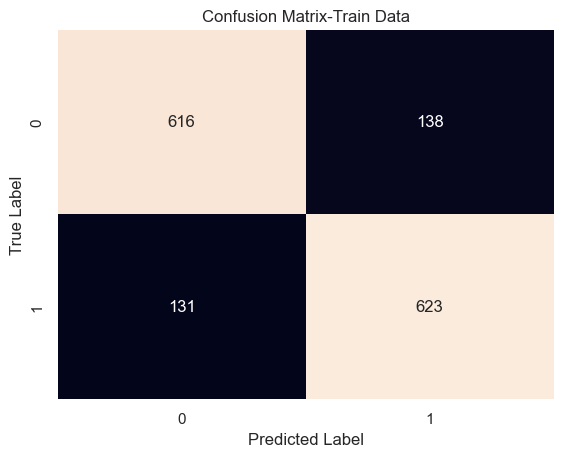

In [110]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train_res,NB_SM_model.predict(X_train_res))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Train Data')
plt.show()

## ROC_AUC Curve for Naive Bayes with SMOTE Model on train data set

The ROC_AUC score for Naive Bayes with SMOTE train data set 0.887 


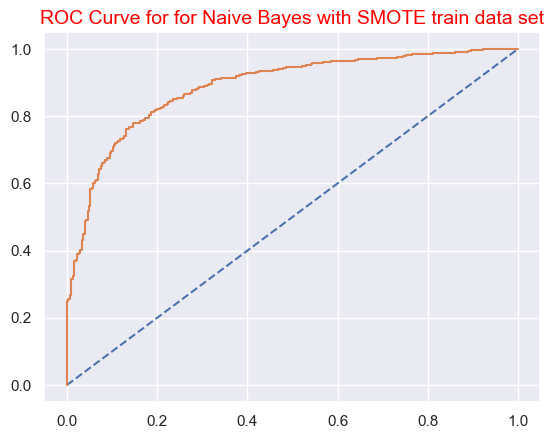

In [111]:
probs = NB_SM_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for Naive Bayes with SMOTE train data set %.3f " % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for for Naive Bayes with SMOTE train data set",fontsize=14,color = 'red');

In [112]:
# Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
SMOTE_model_score_test = NB_SM_model.score(X_test, y_test)
print("The SMOTE Model Score for test data set is %.3f " % SMOTE_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The SMOTE Model Score for test data set is 0.809 
[[125  28]
 [ 59 244]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.74       153
           1       0.90      0.81      0.85       303

    accuracy                           0.81       456
   macro avg       0.79      0.81      0.80       456
weighted avg       0.82      0.81      0.81       456



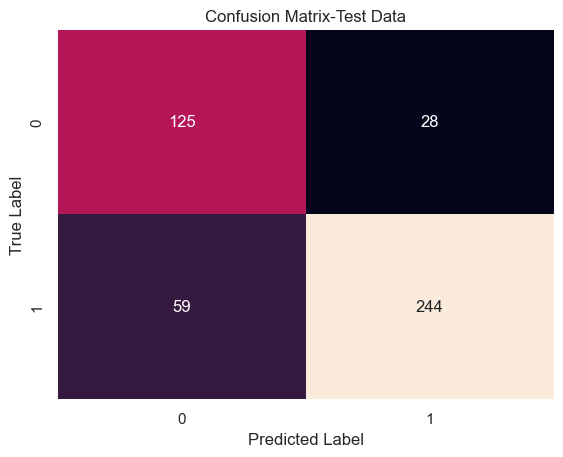

In [113]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,NB_SM_model.predict(X_test))),annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Test Data')
plt.show()

## ROC_AUC Curve for Naive Bayes with SMOTE Model on test data set

The ROC_AUC score for Naive Bayes with SMOTE test data set 0.876 


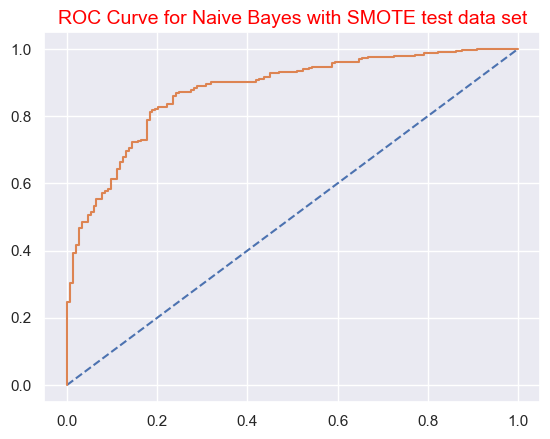

In [114]:
probs_test = NB_SM_model.predict_proba(X_test)
probs_test = probs_test[:, 1]
auc = roc_auc_score(y_test, probs_test)
print("The ROC_AUC score for Naive Bayes with SMOTE test data set %.3f " % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr)
plt.title("ROC Curve for Naive Bayes with SMOTE test data set",fontsize=14,color = 'red');

## Random Forest

In [115]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [117]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
RF_model_score_train =RF_model.score(X_train, y_train)
print("The random Forest Score on train data is %.2f " % RF_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The random Forest Score on train data is 1.00 
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



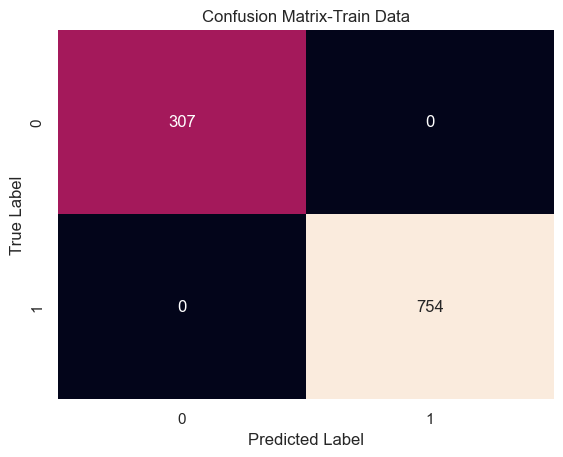

In [116]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,RF_model.predict(X_train))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Train Data')
plt.show()

In [119]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
RF_model_score_test = RF_model.score(X_test, y_test)
print("The random Forest Score on test data is %.3f " % RF_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The random Forest Score on test data is 0.831 
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



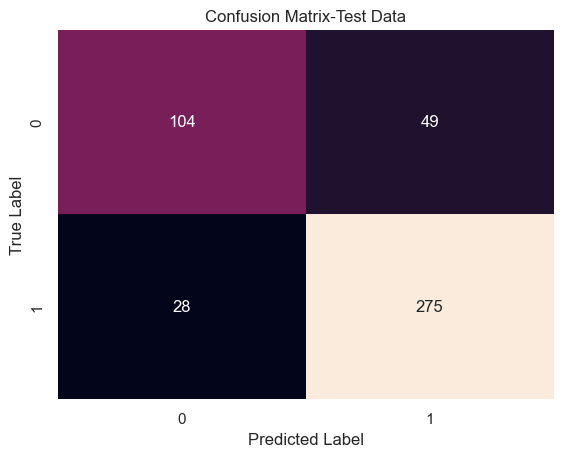

In [120]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,RF_model.predict(X_test))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix-Test Data')
plt.show()

In [121]:
(RF_model_score_train-RF_model_score_test)*100

16.885964912280706

## Bagging

In [122]:
cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

In [123]:
# Performance Matrix on train data set
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score_train=Bagging_model.score(X_train,y_train)
print("The Bagging Model Score for train data set is %.2f " % Bagging_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The Bagging Model Score for train data set is 0.97 
[[278  29]
 [  5 749]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



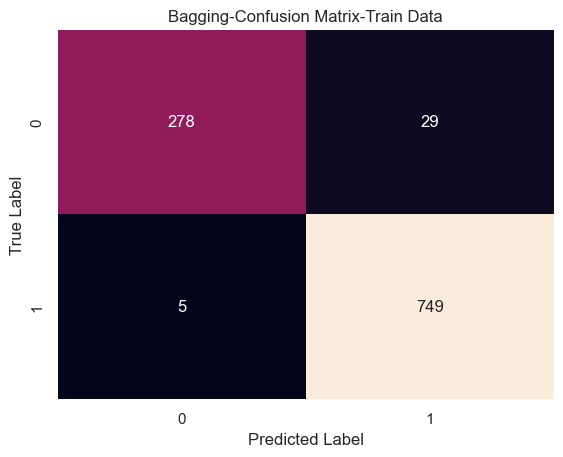

In [124]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,Bagging_model.predict(X_train))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bagging-Confusion Matrix-Train Data')
plt.show()

In [125]:
## Performance Matrix on test data set
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score_test=Bagging_model.score(X_test,y_test)
print("The Bagging Model Score for test data set is %.2f " % Bagging_model_score_test)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

The Bagging Model Score for test data set is 0.83 
[[104  49]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



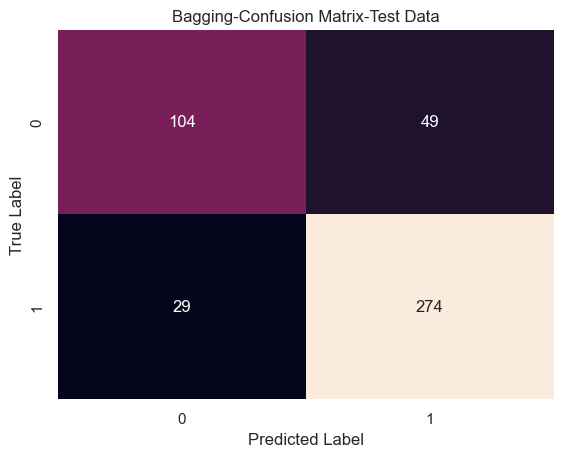

In [126]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,Bagging_model.predict(X_test))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bagging-Confusion Matrix-Test Data')
plt.show()

In [145]:
(Bagging_model_score_train-Bagging_model_score_test)

0.13900739123964478

## Boosting

### Ada Boost

In [127]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [128]:
## Performance Matrix on train data set
y_train_predict=ADB_model.predict(X_train)
ADB_model_score_train=ADB_model.score(X_train,y_train)
print("The ADA boost Model Score for train data set is %.3f " % ADB_model_score_train)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

The ADA boost Model Score for train data set is 0.850 
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



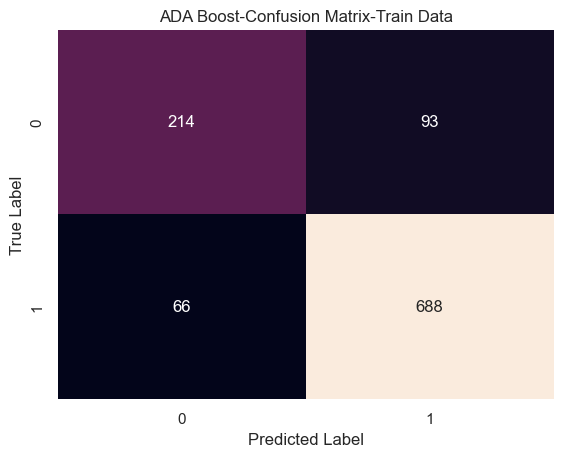

In [129]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,ADB_model.predict(X_train))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADA Boost-Confusion Matrix-Train Data')
plt.show()

In [130]:
# Performance Matrix on train data set
y_test_predict = ADB_model.predict(X_test)
ADB_model_score_test = ADB_model.score(X_test, y_test)
print("The ADA boost Model Score for test data set is %.3f " % ADB_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The ADA boost Model Score for test data set is 0.814 
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



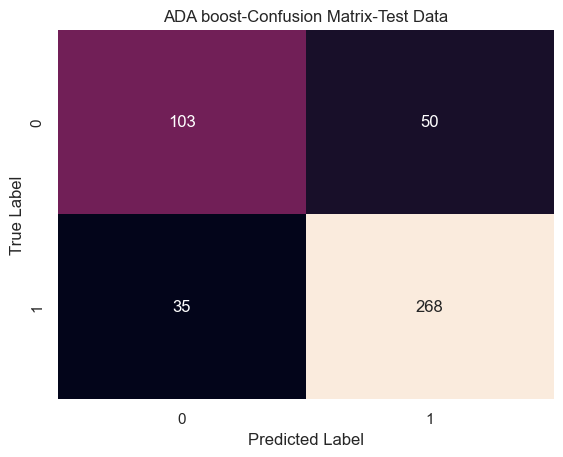

In [131]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,ADB_model.predict(X_test))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ADA boost-Confusion Matrix-Test Data')
plt.show()

In [132]:
(ADB_model_score_train-ADB_model_score_test)*100

3.654488483225027

## Gradient Boosting

In [133]:
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [134]:
# Performance Matrix on train data set
y_train_predict = gbc_model.predict(X_train)
gbc_model_score_train = gbc_model.score(X_train, y_train)
print("The Gradient Boosting Score for train data set is %.2f " % gbc_model_score_train)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

The Gradient Boosting Score for train data set is 0.89 
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



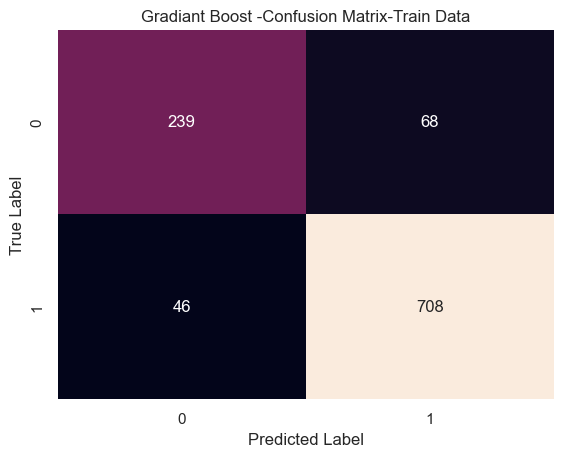

In [135]:
# Get the confusion matrix on the train data
sns.heatmap((metrics.confusion_matrix(y_train,gbc_model.predict(X_train))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradiant Boost -Confusion Matrix-Train Data')
plt.show()

In [136]:
# Performance Matrix on test data set
y_test_predict = gbc_model.predict(X_test)
gbc_model_score_test = gbc_model.score(X_test, y_test)
print("The Gradient Boosting Score for test data set is %.2f " % gbc_model_score_test)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

The Gradient Boosting Score for test data set is 0.84 
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



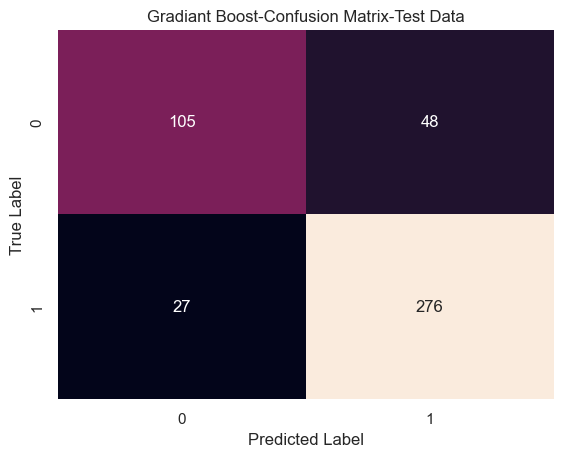

In [137]:
# Get the confusion matrix on the test data
sns.heatmap((metrics.confusion_matrix(y_test,gbc_model.predict(X_test))),annot=True,fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Gradiant Boost-Confusion Matrix-Test Data')
plt.show()

In [138]:
(gbc_model_score_train-gbc_model_score_test)*100

5.702787836698253

## Comparison of Different Models

The Best Logistic Regression Model Score on train data set is 0.83 


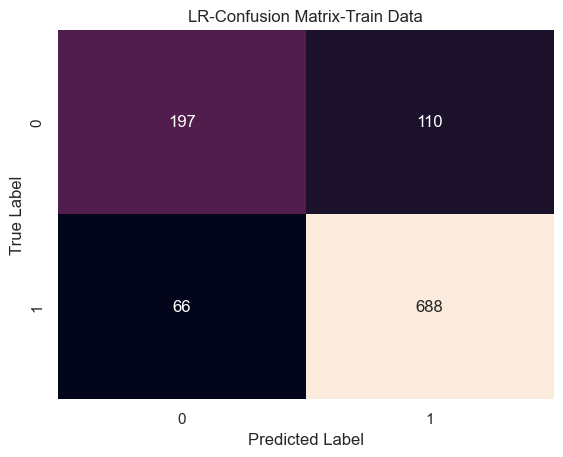

In [139]:
## Performance Matrix on train data set
print("The Best Logistic Regression Model Score on train data set is %.2f " % best_model_score_train)
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lr.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lr.predict(X_train)),annot=True, fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LR-Confusion Matrix-Train Data')
plt.show()

The ROC_AUC score for Logistic Regression Train data set: 0.890


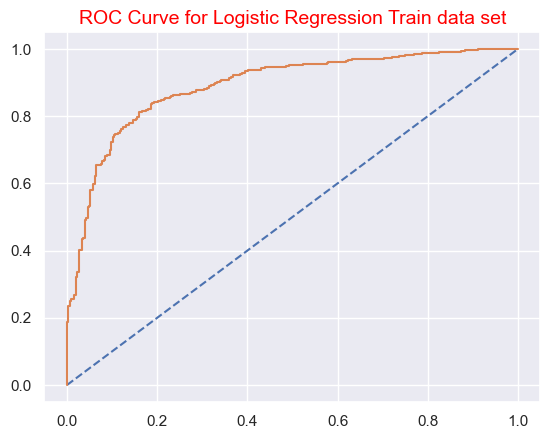

In [140]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('The ROC_AUC score for Logistic Regression Train data set: %.3f' % auc)
# calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for Logistic Regression Train data set",fontsize=14,color = 'red');

### Performance Matrix of LDA (linear discriminant analysis) on train data set

The Best LDA Model Score on train data set is 0.84 


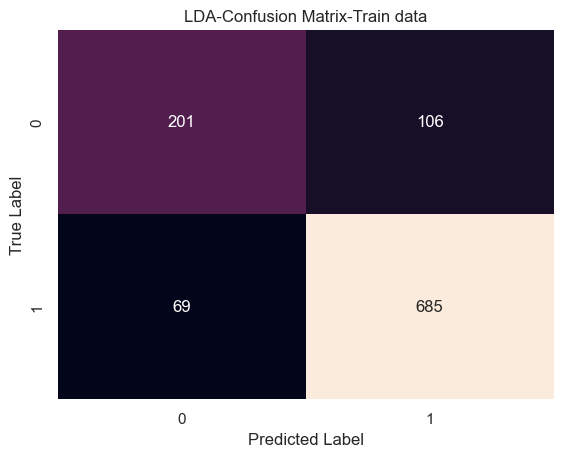

In [141]:
# Performance Matrix on train data set
print("The Best LDA Model Score on train data set is %.2f " % best_model_lda.score(X_train, y_train))
# Get the confusion matrix on the train data
confusion_matrix(y_train,best_model_lda.predict(X_train))
sns.heatmap(confusion_matrix(y_train,best_model_lda.predict(X_train)),annot=True, fmt='.5g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('LDA-Confusion Matrix-Train data')
plt.show()

The ROC_AUC score for LDA Train data set 0.89 


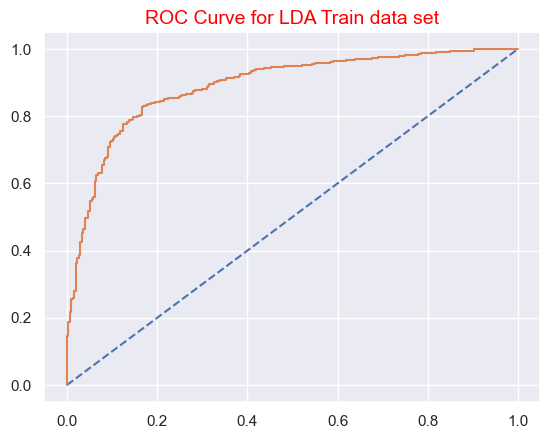

In [142]:
# predict probabilities
probs = best_model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print("The ROC_AUC score for LDA Train data set %.2f " % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.title("ROC Curve for LDA Train data set",fontsize=14,color = 'red');

In [143]:
print("The Best Logistic Regression Model Score on train data set post tuning is %.3f " % best_model_lr.score(X_train, y_train))
print("The Best Logistic Regression Model Score on test data set post tuning is %.3f " % best_model_score_test)
print("The Best LDA Model Score on train data set post tuning is %.3f " % best_model_lda_score_train)
print("The Best LDA Model Score on test data post tuning set is %.3f " % best_model_lda_score_test)
print("The KNN Model Score Post Tuning on Train data %.3f " % KNN_model_1.score(X_train, y_train))
print("The KNN Model Score Post Tuning on Test data %.3f " % KNN_model_1.score(X_test, y_test))
print("The Naive Bayes Model Score Post Tuning on train data is %.3f " % NB_SM_model.score(X_train_res, y_train_res))
print("The Naive Bayes Model Score Post Tuning on test data is %.3f " % NB_SM_model.score(X_test, y_test))

The Best Logistic Regression Model Score on train data set post tuning is 0.834 
The Best Logistic Regression Model Score on test data set post tuning is 0.829 
The Best LDA Model Score on train data set post tuning is 0.835 
The Best LDA Model Score on test data post tuning set is 0.831 
The KNN Model Score Post Tuning on Train data 0.843 
The KNN Model Score Post Tuning on Test data 0.829 
The Naive Bayes Model Score Post Tuning on train data is 0.822 
The Naive Bayes Model Score Post Tuning on test data is 0.809 


In [144]:
print("Variance in Test and train Scores of LR Model is %.5f " % (best_model_lr.score(X_train, y_train)-best_model_lr.score(X_test, y_test)))
print("Variance in Test and train Scores of LDA Model is %.5f " % (best_model_lda.score(X_train, y_train)-best_model_lda.score(X_test, y_test)))
print("Variance in Test and train Scores of KNN Model for is %.5f " % (KNN_model_1.score(X_train, y_train)-KNN_model_1.score(X_test, y_test)))
print("Variance in Test and train Scores of NB Model for is %.5f " % (NB_SM_model.score(X_train_res, y_train_res)-NB_SM_model.score(X_test, y_test)))

Variance in Test and train Scores of LR Model is 0.00517 
Variance in Test and train Scores of LDA Model is 0.00392 
Variance in Test and train Scores of KNN Model for is 0.01365 
Variance in Test and train Scores of NB Model for is 0.01241 


## Cross Validation

In [146]:
from sklearn.model_selection import cross_val_score

In [147]:
scores = cross_val_score(best_model_lda, X_train, y_train, cv=10)
scores

array([0.78504673, 0.77358491, 0.83962264, 0.85849057, 0.85849057,
       0.8490566 , 0.81132075, 0.8490566 , 0.81132075, 0.82075472])

In [148]:
scores = cross_val_score(best_model_lda, X_test, y_test, cv=10)
scores

array([0.80434783, 0.76086957, 0.86956522, 0.82608696, 0.89130435,
       0.86956522, 0.93333333, 0.84444444, 0.75555556, 0.84444444])

# PROBLEM 2

In [150]:
## Importing the necessary libraries along with the standard import
import numpy as np
import pandas as pd
import re # this is the regular expression library which helps us manipulate text (strings)
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
# Code Snippet to extract the three speeches:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
import nltk
nltk.download('punkt')


import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Error loading inaugural: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [151]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.21.5
Pandas version: 1.4.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.7
Matplotlib version: 3.5.2


In [152]:
inaugural.fileids()
FDR=inaugural.raw('1941-Roosevelt.txt')
JFK=inaugural.raw('1961-Kennedy.txt')
RNX=inaugural.raw('1973-Nixon.txt')

In [153]:
FDR

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [154]:
JFK

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [155]:
RNX

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

#### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [156]:
inaugural.fileids()
# Number of characters
FDR_char = inaugural.raw('1941-Roosevelt.txt')
JFK_char = inaugural.raw('1961-Kennedy.txt')
RNX_char = inaugural.raw('1973-Nixon.txt')

In [157]:
# Count the number of characters in each speech
num_characters_FDR = len(FDR_char)
num_characters_JFK = len(JFK_char)
num_characters_RNX = len(RNX_char)

In [158]:
# Print the results
print('Number of Characters in Speech of President Franklin D. Roosevelt in 1941:', num_characters_FDR)
print('Number of Characters in Speech of President John F. Kennedy in 1961:', num_characters_JFK)
print('Number of Characters in Speech of President Richard Nixon in 1973:', num_characters_RNX)

Number of Characters in Speech of President Franklin D. Roosevelt in 1941: 7571
Number of Characters in Speech of President John F. Kennedy in 1961: 7618
Number of Characters in Speech of President Richard Nixon in 1973: 9991


In [159]:
# Number of words
FDR_words = inaugural.words('1941-Roosevelt.txt')
JFK_words = inaugural.words('1961-Kennedy.txt')
RNX_words = inaugural.words('1973-Nixon.txt')
print('Number of words in Speech of President Franklin D. Roosevelt in 1941 are', len(FDR_words))
print('Number of words in Speech of President John F. Kennedy in 1961 are', len(JFK_words))
print('Number of words in Speech of President Richard Nixon in 1973 are', len(RNX_words))

Number of words in Speech of President Franklin D. Roosevelt in 1941 are 1536
Number of words in Speech of President John F. Kennedy in 1961 are 1546
Number of words in Speech of President Richard Nixon in 1973 are 2028


In [160]:
# Number of sentences
FDR_sen = inaugural.sents('1941-Roosevelt.txt')
JFK_sen = inaugural.sents('1961-Kennedy.txt')
RNX_sen = inaugural.sents('1973-Nixon.txt')

In [161]:
# Count the number of sentences in each speech
num_sentences_FDR = len(FDR_sen)
num_sentences_JFK = len(JFK_sen)
num_sentences_RNX = len(RNX_sen)

In [162]:
# Print the results
print('Number of Sentences in Speech of President Franklin D. Roosevelt in 1941:', num_sentences_FDR)
print('Number of Sentences in Speech of President John F. Kennedy in 1961:', num_sentences_JFK)
print('Number of Sentences in Speech of President Richard Nixon in 1973:', num_sentences_RNX)

Number of Sentences in Speech of President Franklin D. Roosevelt in 1941: 68
Number of Sentences in Speech of President John F. Kennedy in 1961: 52
Number of Sentences in Speech of President Richard Nixon in 1973: 69


#### 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [163]:
# Combine NLTK's stopwords with punctuation symbols to create a comprehensive stopwords set
stopwords_clean = set(stopwords.words('english') + list(string.punctuation))

def remove_stopwords(array, stopwords_clean):
    filtered = []
    for a in array:
        al = a.lower()
        if al not in stopwords_clean and a != '--':
            filtered.append(al)
    return filtered

# Assuming you have the word lists for each speech in 'FDR_words', 'JFK_words', and 'RNX_words'
# You can apply the remove_stopwords function to each word list to get the cleaned versions

FDR_words_clean = remove_stopwords(FDR_words, stopwords_clean)
JFK_words_clean = remove_stopwords(JFK_words, stopwords_clean)
RNX_words_clean = remove_stopwords(RNX_words, stopwords_clean)

# Print the number of words before and after removal of stopwords for each speech
print('Number of words in Speech of President Franklin D. Roosevelt in 1941 - before removal of stopwords:', len(FDR_words))
print('Number of words in Speech of President Franklin D. Roosevelt in 1941 - after removal of stopwords:', len(FDR_words_clean))

print('Number of words in Speech of President John F. Kennedy in 1961 - before removal of stopwords:', len(JFK_words))
print('Number of words in Speech of President John F. Kennedy in 1961 - after removal of stopwords:', len(JFK_words_clean))

print('Number of words in Speech of President Richard Nixon in 1973 - before removal of stopwords:', len(RNX_words))
print('Number of words in Speech of President Richard Nixon in 1973 - after removal of stopwords:', len(RNX_words_clean))

Number of words in Speech of President Franklin D. Roosevelt in 1941 - before removal of stopwords: 1536
Number of words in Speech of President Franklin D. Roosevelt in 1941 - after removal of stopwords: 632
Number of words in Speech of President John F. Kennedy in 1961 - before removal of stopwords: 1546
Number of words in Speech of President John F. Kennedy in 1961 - after removal of stopwords: 697
Number of words in Speech of President Richard Nixon in 1973 - before removal of stopwords: 2028
Number of words in Speech of President Richard Nixon in 1973 - after removal of stopwords: 836


In [164]:
example_sent = """On each national day of inauguration since 1789, the people have renewed their sense of dedication 
                to the United States."""

# Combine NLTK's stopwords with punctuation symbols to create a comprehensive stopwords set
stopwords_clean = set(stopwords.words('english') + list(string.punctuation))

# Tokenize the example sentence into words
word_tokens = word_tokenize(example_sent)

# Filter out stopwords from the word tokens
filtered_sentence = [w for w in word_tokens if not w.lower() in stopwords_clean]

# Alternatively, you can use a loop to create the filtered_sentence
# filtered_sentence = []
# for w in word_tokens:
#     if w not in stopwords_clean:
#         filtered_sentence.append(w)

# Print the original example sentence with stopwords
print("Original example sentence:", word_tokens)

# Print the filtered sentence after the removal of stopwords
print("Filtered sentence:", filtered_sentence)

Original example sentence: ['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.']
Filtered sentence: ['national', 'day', 'inauguration', 'since', '1789', 'people', 'renewed', 'sense', 'dedication', 'United', 'States']


#### 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [165]:
# Download the 'punkt' tokenizer and 'stopwords' resource from NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Sample inaugural addresses of three presidents
FDR_address = FDR
JFK_address = JFK
RNX_address = RNX
# Function to remove stopwords and punctuation from a list of words
def remove_stopwords(array):
    stopwords_clean = set(stopwords.words('english') + list(string.punctuation))
    filtered = [w.lower() for w in array if w.lower() not in stopwords_clean and w != '--']
    return filtered

# Function to find the word that occurs the most number of times in a given array of words
def most_common_word(array):
    Ctr = Counter(array)
    most_common_word, count = Ctr.most_common(1)[0]
    return most_common_word, count

# Tokenize and clean the inaugural addresses by removing stopwords and punctuation
FDR_words = word_tokenize(FDR_address)
JFK_words = word_tokenize(JFK_address)
RNX_words = word_tokenize(RNX_address)

FDR_words_clean = remove_stopwords(FDR_words)
JFK_words_clean = remove_stopwords(JFK_words)
RNX_words_clean = remove_stopwords(RNX_words)

# Find the most common word and top three words for each president's inaugural address
FDR_most_common_word, FDR_word_count = most_common_word(FDR_words_clean)
JFK_most_common_word, JFK_word_count = most_common_word(JFK_words_clean)
RNX_most_common_word, RNX_word_count = most_common_word(RNX_words_clean)

# Function to find the top three words with the most occurrences in a given array of words
def top_n_words(array, n=3):
    Ctr = Counter(array)
    top_words = Ctr.most_common(n)
    return top_words

FDR_top_words = top_n_words(FDR_words_clean)
JFK_top_words = top_n_words(JFK_words_clean)
RNX_top_words = top_n_words(RNX_words_clean)

# Print the results
print("Most common word in the inaugural address of President Franklin D. Roosevelt in 1941:", FDR_most_common_word, "(Count:", FDR_word_count, ")")
print("Top three words in the inaugural address of President Franklin D. Roosevelt in 1941:", FDR_top_words)

print("Most common word in the inaugural address of President John F. Kennedy in 1961:", JFK_most_common_word, "(Count:", JFK_word_count, ")")
print("Top three words in the inaugural address of President John F. Kennedy in 1961:", JFK_top_words)

print("Most common word in the inaugural address of President Richard Nixon in 1973:", RNX_most_common_word, "(Count:", RNX_word_count, ")")
print("Top three words in the inaugural address of President Richard Nixon in 1973:", RNX_top_words)

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


Most common word in the inaugural address of President Franklin D. Roosevelt in 1941: nation (Count: 12 )
Top three words in the inaugural address of President Franklin D. Roosevelt in 1941: [('nation', 12), ('know', 10), ('spirit', 9)]
Most common word in the inaugural address of President John F. Kennedy in 1961: let (Count: 16 )
Top three words in the inaugural address of President John F. Kennedy in 1961: [('let', 16), ('us', 12), ('world', 8)]
Most common word in the inaugural address of President Richard Nixon in 1973: us (Count: 26 )
Top three words in the inaugural address of President Richard Nixon in 1973: [('us', 26), ('let', 22), ('america', 21)]


[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


#### 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords).

In [166]:
# Word Cloud 
from wordcloud import WordCloud
def word_cloud(w):
 wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(w)
 plt.figure(figsize = (8, 8), facecolor = None)
 plt.imshow(wordcloud)
 plt.axis("off")
 plt.tight_layout(pad = 0)
 plt.show()

Word Cloud for President Franklin D. Roosevelt speech in 1941


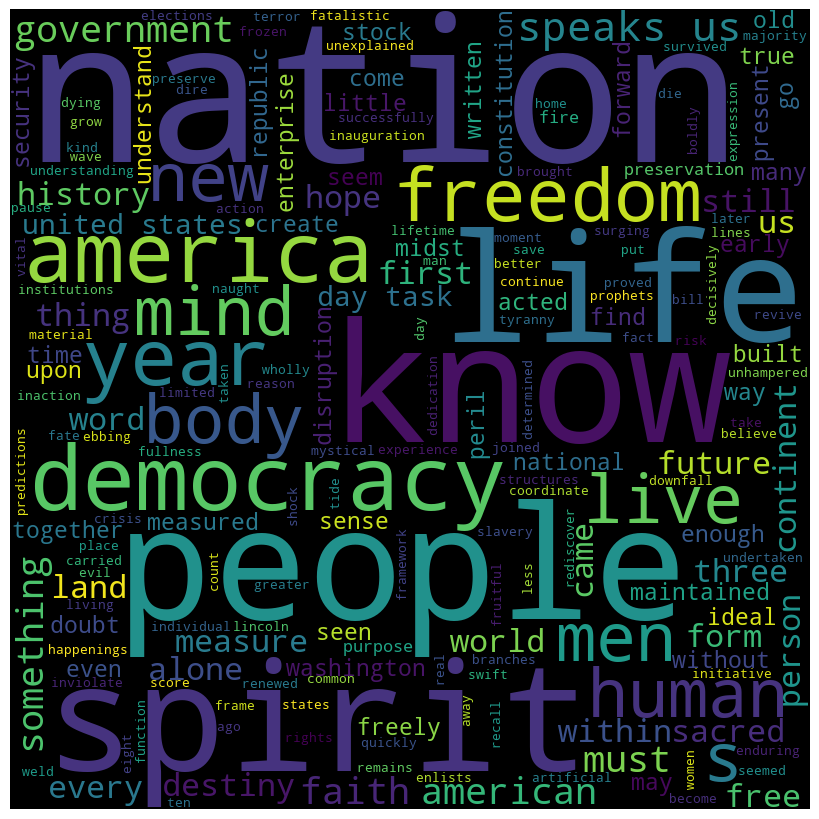

In [167]:
# Word Cloud for President Franklin D. Roosevelt speech in 1941
print('Word Cloud for President Franklin D. Roosevelt speech in 1941')
word_cloud((" ").join(FDR_words_clean))

Word Cloud for President John F. Kennedy speech in 1961


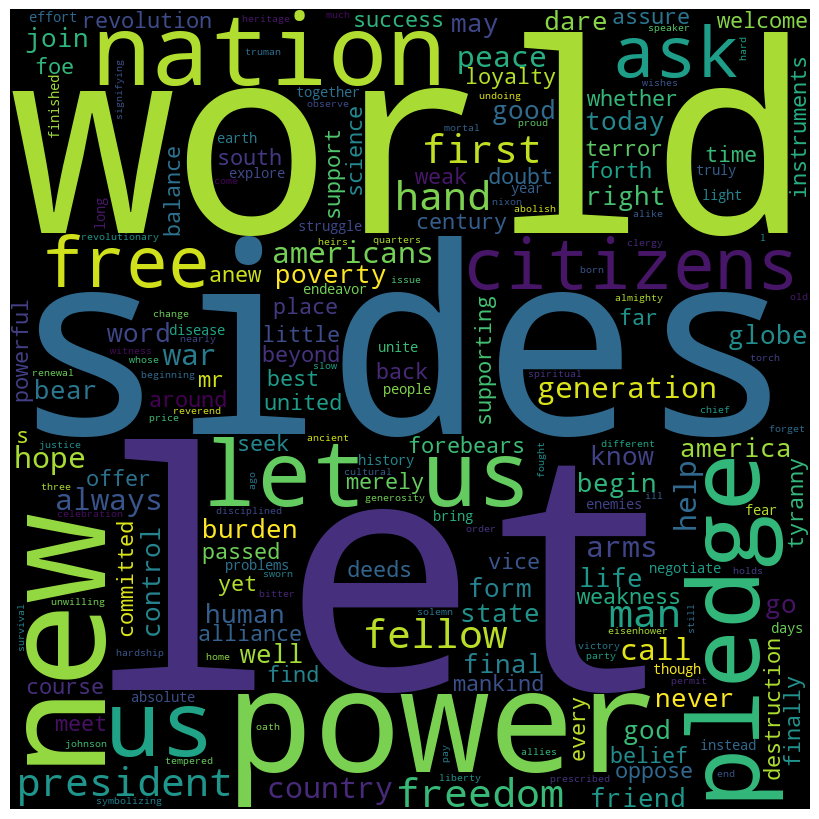

In [168]:
# Word Cloud for President John F. Kennedy speech in 1961
print('Word Cloud for President John F. Kennedy speech in 1961')
word_cloud((" ").join(JFK_words_clean))

Word Cloud for President Richard Nixon speech in 1973


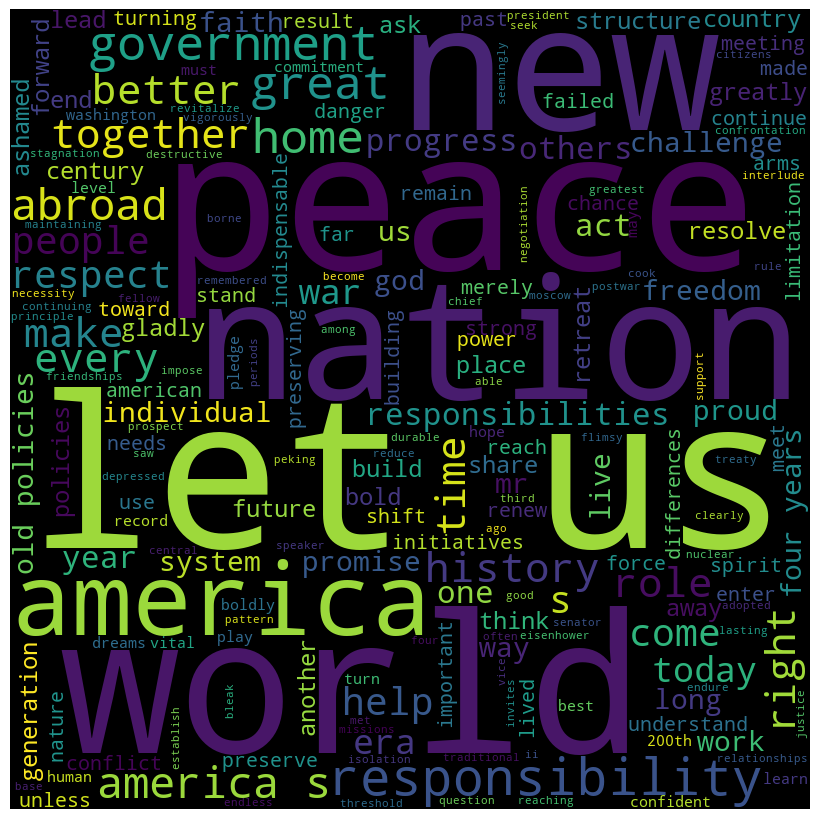

In [169]:
# Word Cloud for President Richard Nixon speech in 1973
print('Word Cloud for President Richard Nixon speech in 1973')
word_cloud((" ").join(RNX_words_clean))